### Project: Used car price recommender, based on the car specification and user preferences.

<br>
<b>TEAM NAME: CODE MONKEYS</b>
<br>
TEAM GITHUB LINK: https://github.com/kode-monkeys/machine-learning/blob/master/Project1/kode_monkeys_project_consolidated_latest.ipynb
</br>

<br>
<b>PROBLEM STATEMENT:</b>
<br>
Car sales representatives are masters at tricking us into buying cars. A lot of times they box us into decisions and want us to buy immediately by telling us 'its a one time offer, if you dont commit now, you wont get this amazing deal.We want to come up with a way that a customer can easily go to a portal and say, 'this is the make, model, year, mileage of a car; give me the estimated best sale value'. This will help buyers to take confident decisions. This can also be used by sales to determine good margins for their used cars and also determine if a car can be bought from a seller based on what the current KBB value is.

<br>
<b>BUSINESS GOAL</b>
<br>
The business goal is to help the user/buyer to find the most desirable used car based on their budget and their preferences of the car specification. Based on the features available, what would be the desirable price for the car, setting the right price would help the buyer/seller to conclude the sale efficiently.
<br>
Our project is trying to fulfill two goals. The first is to build a model that predicts the price of a used car based on its specification (so user can know if the asking price for a particular used car is reasonable given the specification provided). Additionally, the kodemonkey will provide a recommended system for the used cars which will recommend a car to the buyer if a car is most recent (year of registration is greater than 2008) and if it has run for less than 100000 KMs and if the car did not have any damage/repair.

<br>
<b>DATASET</b>
<br>
Why did we choose to work on this business problem?
<br>
Often when we want to buy a car, we will be falling for the dealer’s presentation of all the cool feature a car has.  But we never know if those features are actually the ones that have the most impact on price of a car.  That’s why we are easi8ly manipulated by the sales person to go for a car that they recommend us without having proper knowledge about the fact that if those features that they are presenting to us are actually the ones that have the significant impact on a car.  So we thought it would be really nice if we can figure out the features that have high impact on a price of a car by applying the Machine Learning Algorithms.  So next time a customer wants to buy a car they would know if the dealer is actually being genuine to them by what they are presenting or they are just trying to make us to buy that specific car.

Links to dataset : 
autos.csv: https://www.kaggle.com/orgesleka/used-cars-database/
mpg.csv: https://vincentarelbundock.github.io/Rdatasets/csv/ggplot2/mpg.csv
<br>

### TEAM MEMBERS
<br>
Golnaz Bidabadi
golnaz.bidabadi@sjsu.edu
008022755
<br>
Puja Kawale
puja.kawale@sjsu.edu
012506156
<br>
Supreetha Ganapathi
supreetha.ganapathi@sjsu.edu
011332646
<br>
Swetha Chandrasekar
swetha.chandrasekar@sjsu.edu
012497628
<br>
Vijay Samuel
vijay.samuel@sjsu.edu 
012506546


In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib as mpl
import collections
import matplotlib.pyplot as plt
from matplotlib import colors
import pylab as plt

from sklearn.metrics import silhouette_score
from matplotlib import colors

import numpy as np
from scipy import stats
import datetime
from collections import defaultdict
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn import preprocessing
import seaborn
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score

from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


%matplotlib inline

import scipy.stats as stats

import sklearn
import statsmodels.api as sm
from sklearn import metrics

from scipy.stats import mode

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

C:\Users\PB\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


##### Dataset:

https://www.kaggle.com/orgesleka/used-cars-database/
<br>
The dataset consisted of 370K records of used-cars getting sold in the German ebay market.

<b>date_crawled :</b> Date when the selling record was first crawled
<br>
<b>name :</b> Headline posted by the seller
<br>
<b>seller :</b> Whether the seller is a private or dealer
<br>
<b>offertype:</b> Whether the offer is request or completed-deal
<br>
<b>price*:</b> Numerical price of the sold car. Target variable in kaggle competition.
<br>
<b>abtest :</b> Not very useful
<br>
<b>Vehicle type:</b> If the car is a sedan or suv or 3er or jeep
<br>
<b>Year of registration :</b> Year when the car was registered
<br>
<b>gearbox :</b> Automatic or manual
<br>
<b>Power PS :</b> Power of the car
<br>
<b>model :</b> The cars model
<br>
<b>Fuel type :</b> Petrol / diesel/ electric / hybrid etc
<br>
<b>brand :</b> Car brand
<br>
<b>kilometer :</b> Number of kilometers driven
<br>
<b>repaired_damaged :</b> Repaired or damaged
<br>

In [3]:
# import the original dataset from source "https://www.kaggle.com/orgesleka/used-cars-database/"
# DataFrame "data" holds the original dataset downloaded from source
data =  pd.read_csv('C://PUJAMS//machinelearning//csvfiles//autos.csv',encoding='Latin1')

In [4]:
data.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [5]:
#Prepare our working dataset "work_data" by dropping columns and NA records to have cleaned dataset
work_data=data.drop('nrOfPictures',1)
print(data.groupby('seller').size())

seller
gewerblich         3
privat        371525
dtype: int64


In [6]:
# since the values for Seller column is one, does not make sense to have it.
work_data = work_data[work_data.seller != 'gewerblich']
work_data=work_data.drop('seller',1)
print(work_data.groupby('offerType').size())

offerType
Angebot    371513
Gesuch         12
dtype: int64


In [7]:
# Same with the column offerType, since its all single values
work_data = work_data[work_data.offerType != 'Gesuch']
work_data=work_data.drop('offerType',1)
#inspecting: name
print(len(work_data.groupby('name').size()), 'different names for all offers')

233517 different names for all offers


In [8]:
# Again, dropping name, abtest column as they are single values
work_data=work_data.drop('name',1)
work_data=work_data.drop('abtest',1)

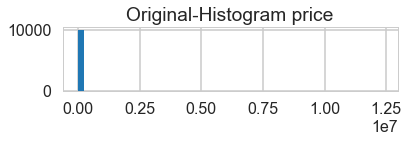

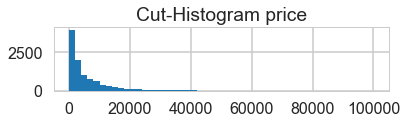

10772 cars with price 0


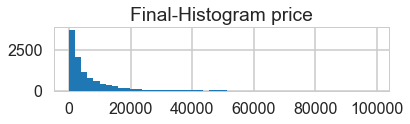

In [9]:
#sample data is temporary dataset just to analyze and plot the histogram
sample_data=work_data.sample(n=10000, random_state=1)
#inspecting: price
plt.subplot(3,1,1)
sample_data['price'].hist(bins=50)
plt.title('Original-Histogram price')
plt.show()
#There are kinda expensive cars on sale. The owners are slightly overestimating the value we guess.

# we decided to cut the price at 100000
work_data = work_data[work_data.price < 100000]
sample_data=work_data.sample(n=10000, random_state=1)

plt.subplot(3,1,2)
sample_data['price'].hist(bins=50)
plt.title('Cut-Histogram price')
plt.show()

#There are 10772 cars with price as 0, so we have to drop them
print(len(work_data[work_data.price == 0]), 'cars with price 0')
work_data = work_data[work_data.price != 0]
sample_data=work_data.sample(n=10000, random_state=1)

plt.subplot(3,1,3)
sample_data['price'].hist(bins=50)
plt.title('Final-Histogram price')
plt.show()

In [10]:
# there are lot of values which are greater than 2018 for yearOfRegistration, which makes no sense.
#dropping the values which are prior to 1863 and after 2017
work_data = work_data[(work_data.yearOfRegistration >= 1863) & (work_data.yearOfRegistration <= 2017)]
print(work_data['yearOfRegistration'].unique())

[1993 2011 2004 2001 2008 1995 2014 1998 2005 1910 2016 2007 2009 2002
 1997 1990 2017 1981 2003 1994 1991 1984 2006 1999 2012 2010 2000 1992
 2013 1996 1985 1989 2015 1968 1982 1976 1983 1959 1973 1969 1971 1987
 1986 1988 1967 1980 1970 1965 1945 1925 1974 1979 1955 1978 1972 1977
 1961 1963 1964 1966 1975 1937 1936 1960 1958 1956 1933 1941 1962 1929
 1951 1957 1940 1949 1953 1935 1954 1950 1948 1952 1932 1927 1923 1931
 1942 1911 1930 1944 1943 1947 1934 1938 1928 1939 1946]


In [11]:
print(work_data['brand'].unique())

['volkswagen' 'audi' 'jeep' 'skoda' 'bmw' 'peugeot' 'ford' 'mazda'
 'nissan' 'renault' 'mercedes_benz' 'seat' 'citroen' 'honda' 'fiat' 'opel'
 'mini' 'smart' 'hyundai' 'sonstige_autos' 'alfa_romeo' 'subaru' 'volvo'
 'mitsubishi' 'kia' 'suzuki' 'lancia' 'porsche' 'toyota' 'chevrolet'
 'dacia' 'daihatsu' 'trabant' 'chrysler' 'jaguar' 'daewoo' 'rover' 'saab'
 'land_rover' 'lada']


In [12]:
#remove data with engine power > 1000
print(work_data['powerPS'].describe())
work_data = work_data[(work_data.powerPS > 0) & (work_data.powerPS < 1000)]

count    356355.000000
mean        116.572558
std         186.866013
min           0.000000
25%          73.000000
50%         107.000000
75%         150.000000
max       20000.000000
Name: powerPS, dtype: float64


In [13]:
#Drop NA 
#Creating FINAL dataframe "cleaned data" for our further analysis and transformation.
cleaned_data = work_data
#dropping records which have na as they are not relvant
cleaned_data.dropna(inplace = True)
cleaned_data.head(5)

,dateCrawled,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
3,2016-03-17 16:54:04,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,67112,2016-04-05 18:18:39
10,2016-03-26 19:54:18,2000,limousine,2004,manuell,105,3_reihe,150000,12,benzin,mazda,nein,2016-03-26 00:00:00,96224,2016-04-06 10:45:34


count    247879.000000
mean        129.290077
std          62.041502
min           1.000000
25%          86.000000
50%         116.000000
75%         158.000000
max         999.000000
Name: powerPS, dtype: float64


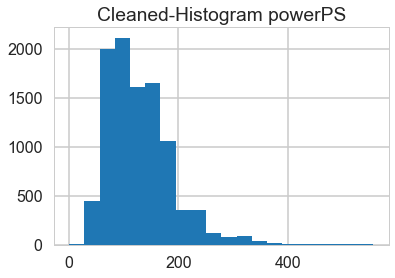

In [14]:
#Inspect powerPS column and plot it using histogram to see the distribution
column_name_you_want_to_inspect='powerPS'
print(cleaned_data[column_name_you_want_to_inspect].describe())

sample_data=cleaned_data.sample(n=10000, random_state=1)
sample_data[column_name_you_want_to_inspect].hist(bins=20)
plt.title('Cleaned-Histogram ' + column_name_you_want_to_inspect)
plt.show()

In [15]:
cleaned_data.head(5)

,dateCrawled,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
3,2016-03-17 16:54:04,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,67112,2016-04-05 18:18:39
10,2016-03-26 19:54:18,2000,limousine,2004,manuell,105,3_reihe,150000,12,benzin,mazda,nein,2016-03-26 00:00:00,96224,2016-04-06 10:45:34


In [16]:
#Converting text from german to english for the column "gearbox"
cleaned_data['gearbox']=np.where(cleaned_data['gearbox']=='manuell','manual',cleaned_data['gearbox'])
cleaned_data['gearbox']=np.where(cleaned_data['gearbox']=='automatik','automatic',cleaned_data['gearbox'])
print(cleaned_data['gearbox'].unique())

['manual' 'automatic']


In [17]:
#Converting text from german to english for the column "fuelType"
cleaned_data['fuelType']=np.where(cleaned_data['fuelType']=='benzin','petrol',cleaned_data['fuelType'])
cleaned_data['fuelType']=np.where(cleaned_data['fuelType']=='elektro','electric',cleaned_data['fuelType'])
cleaned_data['fuelType']=np.where(cleaned_data['fuelType']=='andere','other',cleaned_data['fuelType'])
print(cleaned_data['fuelType'].unique())

['petrol' 'diesel' 'lpg' 'other' 'hybrid' 'cng' 'electric']


In [18]:
#Converting text from german to english for the column "vehicleType"
cleaned_data['vehicleType']=np.where(cleaned_data['vehicleType']=='kleinwagen','smallcar',cleaned_data['vehicleType'])
cleaned_data['vehicleType']=np.where(cleaned_data['vehicleType']=='kombi','Midsize',cleaned_data['vehicleType'])
cleaned_data['vehicleType']=np.where(cleaned_data['vehicleType']=='andere','other',cleaned_data['vehicleType'])
cleaned_data['vehicleType']=np.where(cleaned_data['vehicleType']=='limousine','van',cleaned_data['vehicleType'])
print(cleaned_data['vehicleType'].unique())

['smallcar' 'van' 'cabrio' 'Midsize' 'suv' 'bus' 'coupe' 'other']


In [19]:
#Converting text from german to english for the column "notRepairedDamage"
cleaned_data['notRepairedDamage']=np.where(cleaned_data['notRepairedDamage']=='ja','yes',cleaned_data['notRepairedDamage'])
cleaned_data['notRepairedDamage']=np.where(cleaned_data['notRepairedDamage']=='nein','no',cleaned_data['notRepairedDamage'])
print(cleaned_data['notRepairedDamage'].unique())

['no' 'yes']


In [20]:
print(cleaned_data['kilometer'].describe())

count    247879.000000
mean     123733.716854
std       39854.996502
min        5000.000000
25%      100000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: kilometer, dtype: float64


# Identifying the Latent variable : kode monkeys recommended variable 
<br>
Based on the information provided in the used car dataset as well as the  research we did around what people look at when they want to buy a used car we felt one key information that was missing that could help user to find an appropriate car was the recommendation flag based on:
<br>
If a car is most recent ( year of registration is greater than 2008) and if car has run for less than 100000 KMs and if the car did not have any damage/repair then we recommend the car to the buyer.
<br>
We have a variable, year of registration in the dataset. We created latent variable "years old" to derive how old the car was and see if this variable influences our target price variable.
<br>
We have used both the variables we created in all our analysis.

In [21]:
# ENRICHING our dataset by cleaning/standardizing/adding derived columns
pd.options.mode.chained_assignment = None
import math
#Converting date crawled to a date-time format
cleaned_data['date_crawled']= pd.to_datetime(cleaned_data['dateCrawled'])
# year registered has to be a categorical variable, so converting to STRING datatype
cleaned_data['year_registered'] = cleaned_data['yearOfRegistration'].apply(lambda x: str(x))
# month registered registered has to be a categorical variable, so converting to STRING datatype
cleaned_data['month_registered'] = cleaned_data['monthOfRegistration'].apply(lambda x: str(x))
#deriving date crawled in the correct format
cleaned_data['date_crawled_year']= cleaned_data['dateCrawled'].apply(lambda x: int(x.split('-')[0]))
#deriving the variable, HOW OLD is the car based on the crawled year vs year of Registration
cleaned_data['yearsOld'] =  cleaned_data['date_crawled_year'] - cleaned_data['yearOfRegistration'] ;

In [22]:
cleaned_data['kodemonkeysrecommended']  = cleaned_data.apply(lambda x: 1 if (x['yearOfRegistration']>=2008 and x['kilometer']<=100000 and x['notRepairedDamage']=='no') else 0,axis=1)

In [23]:
print(cleaned_data['price'].unique())

[ 1500  3600   650 ... 24895 10985 14989]


In [24]:
print(cleaned_data['price'].describe())

count    247879.000000
mean       6787.946672
std        8030.154266
min           1.000000
25%        1690.000000
50%        3999.000000
75%        8900.000000
max       99999.000000
Name: price, dtype: float64


##### Creating our target categorical variable to set if the car is expensive or not. we created a range based on price distribution that we obtained from the dataset
<br>
<b>less expensive:</b> When the price is between (0,1690)
<br>
<b>mid low expensive:</b> When the price is between (1691,3999)
<br>
<b>mid high expensive:</b> When the price is between (4000,8900)
<br>
<b>expensive:</b> Any car costing more than 8901 EUR is tagged as less expensive
<br>


In [25]:
conds = [cleaned_data.price.between(0,1690), cleaned_data.price.between(1691,3999),
         cleaned_data.price.between(4000,8900), cleaned_data.price.between(8901,100000)]


choices = ['less_expensive','mid_low_expensive','mid_high_expensive','expensive']


cleaned_data['expense_range'] = np.select(conds,choices, 'other')

#### Data Analysis

In [26]:
print(cleaned_data['expense_range'].unique())

['less_expensive' 'mid_low_expensive' 'expensive' 'mid_high_expensive']


Text(0.5,1,'Boxplot of price  by Less or More Expensive classifier')

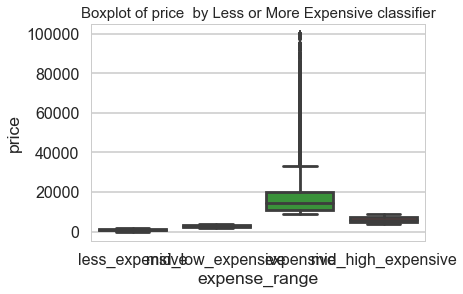

In [27]:
# plotting a box plot to see the variation of price for classifier expensive or not
seaborn.boxplot( x = 'expense_range', y = 'price', data = cleaned_data, orient = 'v' )
plt.title( "Boxplot of price  by Less or More Expensive classifier", fontsize = 15)

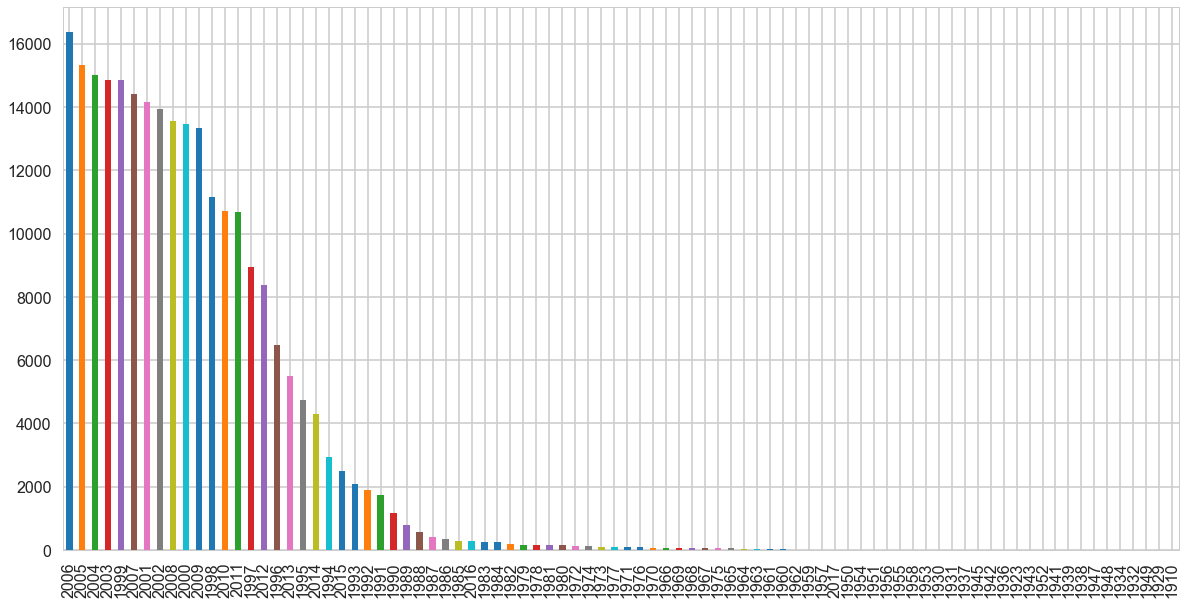

In [28]:
# Created this dataset "count_of_car_by_year" to display the count of cars against the year of registration 
# we can see that 85-90% of the cars listed are registered between 2004 to 2012
count_of_car_by_year=cleaned_data[['yearOfRegistration','brand']]
count_of_car_by_year['yearOfRegistration'].value_counts().plot(kind='bar',figsize=(20,10))
#print(count_of_car_by_year['yearOfRegistration'].value_counts().sort_values())

C:\Users\PB\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\PB\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\PB\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\PB\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


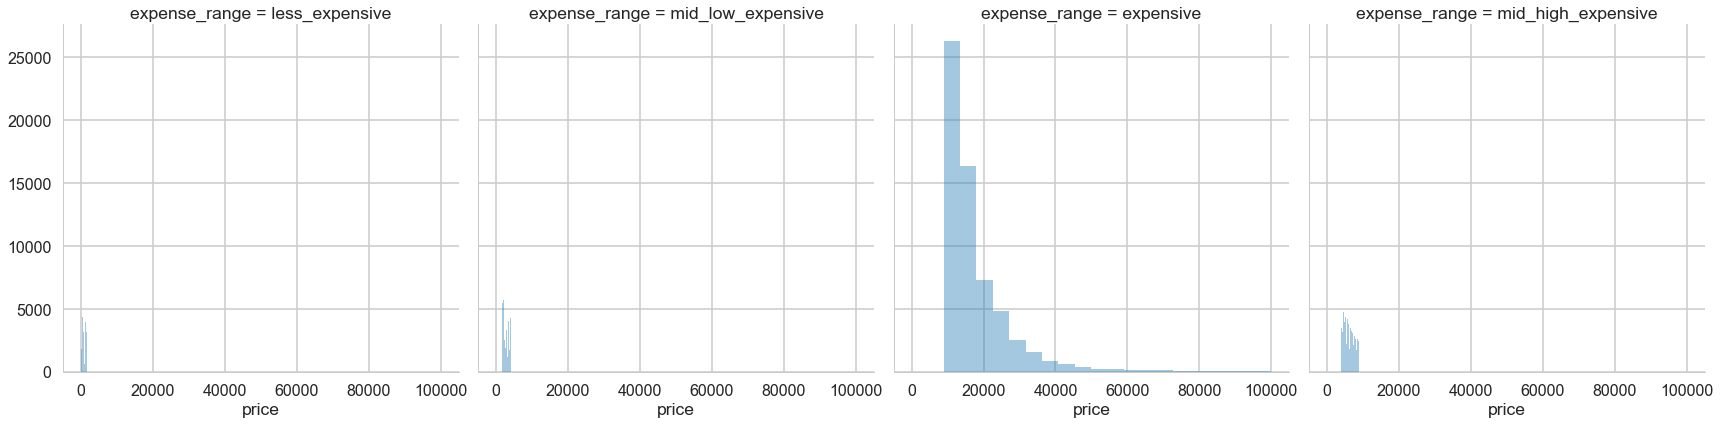

In [29]:
# g is the dataset that holds data from original "cleaned data" against the price considering the classifier variable
# we can see that there are more expensive cars listed than the less expensive one's
g = seaborn.FacetGrid(cleaned_data, col="expense_range", size = 6)
g.map(seaborn.distplot, "price", kde = False, bins = 20 )

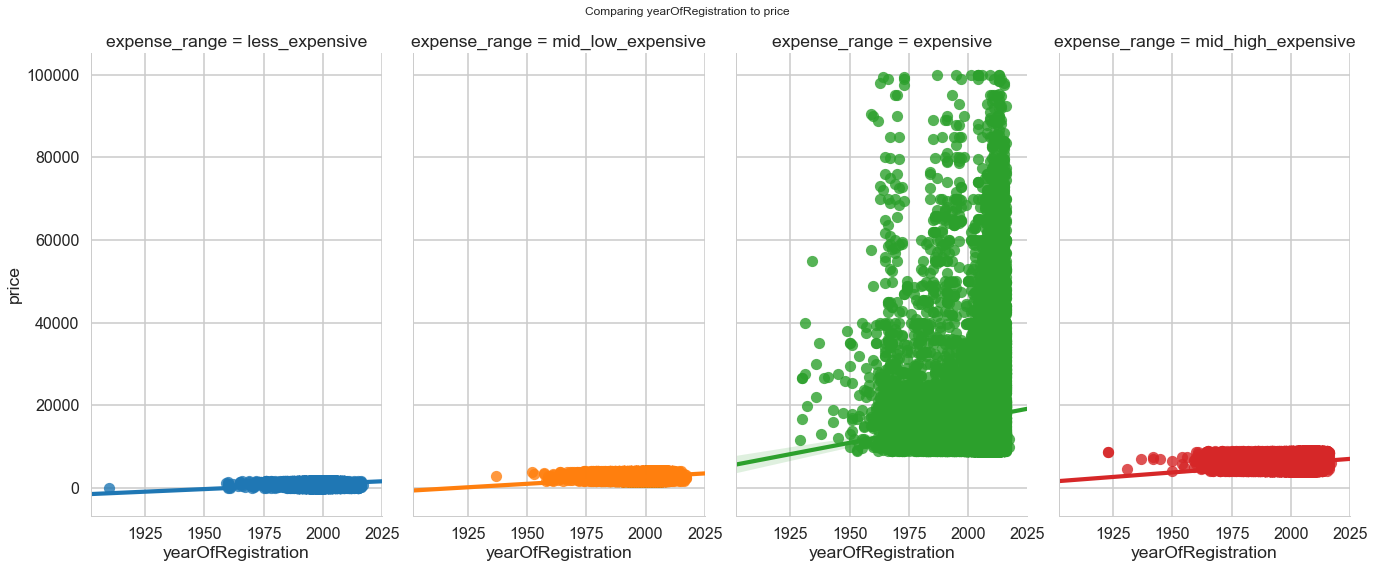

In [30]:
# creating a implot to show the variation of price against year of registration
# we can clearly see that more recent is the car, more expensive it is from this data
yearOfRegistration_vs_price_plots = seaborn.lmplot(x='yearOfRegistration', y='price', data=cleaned_data, 
                                                   hue='expense_range', col='expense_range', size=8, aspect=.6)
plt.subplots_adjust(top=0.9)
yearOfRegistration_vs_price_plots.fig.suptitle("Comparing yearOfRegistration to price")
yearOfRegistration_vs_price_plots.set_axis_labels("yearOfRegistration", "price")

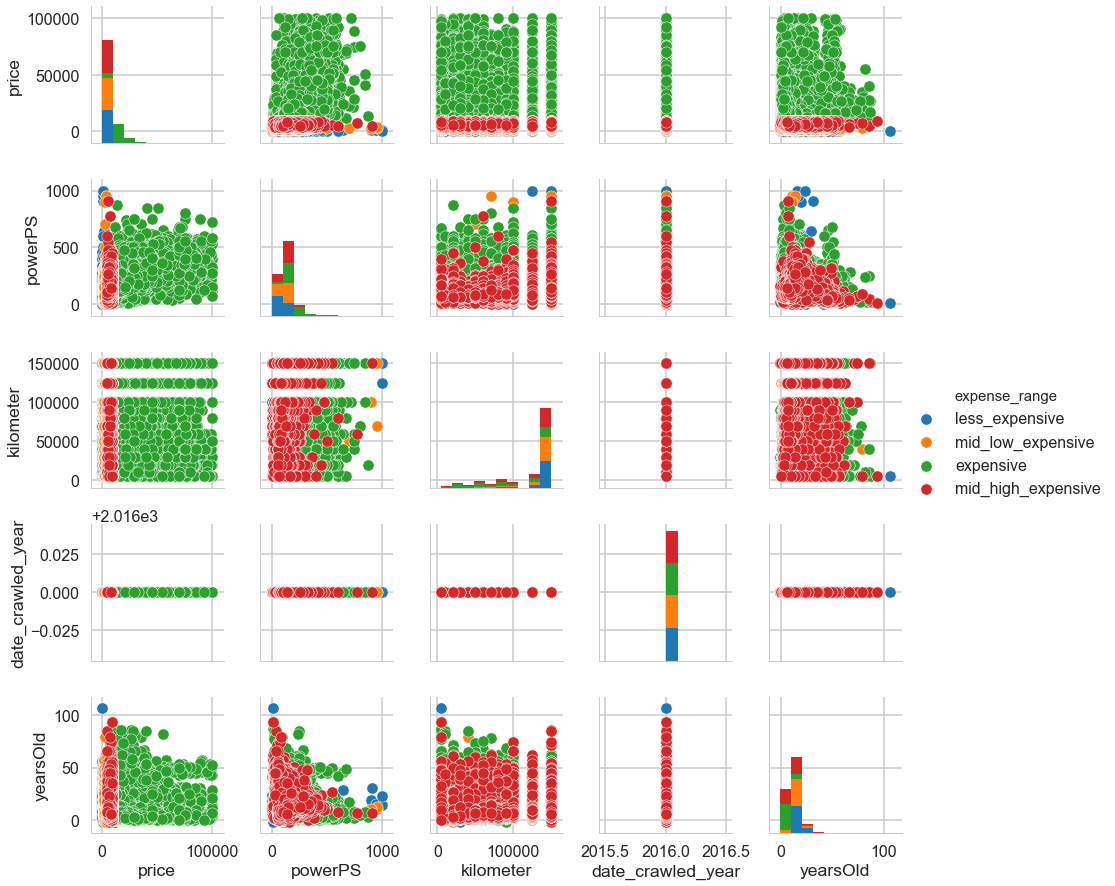

In [31]:
# Created this subset "cleaned_data_numeric" to display pairplot of numeric data to see the distribution
cleaned_data_numeric=cleaned_data[['price','powerPS','kilometer','date_crawled_year',
                                   'yearsOld','expense_range']]
sns.pairplot(cleaned_data_numeric,hue = 'expense_range')

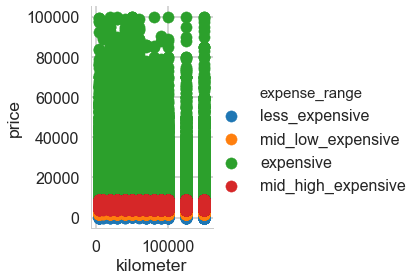

In [32]:
# Lets analyze the numerical data based on our categorical classification of whether car is expensive or not
sns.FacetGrid(cleaned_data_numeric, hue="expense_range", size=4) \
   .map(plt.scatter, "kilometer","price") \
   .add_legend();

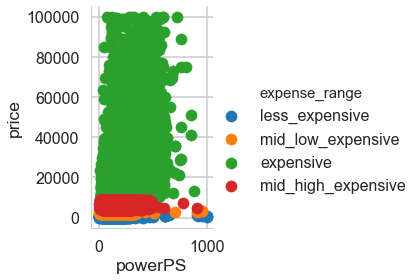

In [43]:
# scatter plot for powerPS vs price. 
# we can see that extreme high values for powerPS are for less expensive cars. Must be bad data
sns.FacetGrid(cleaned_data_numeric, hue="expense_range", size=4) \
   .map(plt.scatter, "powerPS","price") \
   .add_legend();

In [44]:
# Some of the columns have been converted to STRING and hence original INTEGER columns are no longer needed
# So created final dataset "super_cleaned_data"
super_cleaned_data=cleaned_data
super_cleaned_data.head(5)

,dateCrawled,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,...,dateCreated,postalCode,lastSeen,date_crawled,year_registered,month_registered,date_crawled_year,yearsOld,kodemonkeysrecommended,expense_range
3,2016-03-17 16:54:04,1500,smallcar,2001,manual,75,golf,150000,6,petrol,...,2016-03-17 00:00:00,91074,2016-03-17 17:40:17,2016-03-17 16:54:04,2001,6,2016,15,0,less_expensive
4,2016-03-31 17:25:20,3600,smallcar,2008,manual,69,fabia,90000,7,diesel,...,2016-03-31 00:00:00,60437,2016-04-06 10:17:21,2016-03-31 17:25:20,2008,7,2016,8,1,mid_low_expensive
5,2016-04-04 17:36:23,650,van,1995,manual,102,3er,150000,10,petrol,...,2016-04-04 00:00:00,33775,2016-04-06 19:17:07,2016-04-04 17:36:23,1995,10,2016,21,0,less_expensive
6,2016-04-01 20:48:51,2200,cabrio,2004,manual,109,2_reihe,150000,8,petrol,...,2016-04-01 00:00:00,67112,2016-04-05 18:18:39,2016-04-01 20:48:51,2004,8,2016,12,0,mid_low_expensive
10,2016-03-26 19:54:18,2000,van,2004,manual,105,3_reihe,150000,12,petrol,...,2016-03-26 00:00:00,96224,2016-04-06 10:45:34,2016-03-26 19:54:18,2004,12,2016,12,0,mid_low_expensive


In [45]:
super_cleaned_data=super_cleaned_data.drop('dateCrawled',1)
super_cleaned_data=super_cleaned_data.drop('yearOfRegistration',1)
super_cleaned_data=super_cleaned_data.drop('monthOfRegistration',1)
super_cleaned_data.head(5)

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,date_crawled,year_registered,month_registered,date_crawled_year,yearsOld,kodemonkeysrecommended,expense_range
3,1500,smallcar,manual,75,golf,150000,petrol,volkswagen,no,2016-03-17 00:00:00,91074,2016-03-17 17:40:17,2016-03-17 16:54:04,2001,6,2016,15,0,less_expensive
4,3600,smallcar,manual,69,fabia,90000,diesel,skoda,no,2016-03-31 00:00:00,60437,2016-04-06 10:17:21,2016-03-31 17:25:20,2008,7,2016,8,1,mid_low_expensive
5,650,van,manual,102,3er,150000,petrol,bmw,yes,2016-04-04 00:00:00,33775,2016-04-06 19:17:07,2016-04-04 17:36:23,1995,10,2016,21,0,less_expensive
6,2200,cabrio,manual,109,2_reihe,150000,petrol,peugeot,no,2016-04-01 00:00:00,67112,2016-04-05 18:18:39,2016-04-01 20:48:51,2004,8,2016,12,0,mid_low_expensive
10,2000,van,manual,105,3_reihe,150000,petrol,mazda,no,2016-03-26 00:00:00,96224,2016-04-06 10:45:34,2016-03-26 19:54:18,2004,12,2016,12,0,mid_low_expensive


In [46]:
super_cleaned_data.columns

Index(['price', 'vehicleType', 'gearbox', 'powerPS', 'model', 'kilometer',
       'fuelType', 'brand', 'notRepairedDamage', 'dateCreated', 'postalCode',
       'lastSeen', 'date_crawled', 'year_registered', 'month_registered',
       'date_crawled_year', 'yearsOld', 'kodemonkeysrecommended',
       'expense_range'],
      dtype='object')

# Clustering
# K-Means
<br>
There are multiple questions that could be answered with the help of this dataset. For k-means clustering, which is a unsupervised type of learning, we were trying to understand the different type of clusters formed based on the variables used in the prediction. Based on the different variables we used to plot a 2-D k-means chart, we tried to see whether data was too sparse or reasonable clusters were getting formed. We could also answer questions such as : how is the car price varying based on the kilometer driven on the car or power of the car, also what is the influence of year of regirstration on the target price for the car.
    

In [126]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247879 entries, 3 to 371527
Data columns (total 22 columns):
dateCrawled               247879 non-null object
price                     247879 non-null int64
vehicleType               247879 non-null object
yearOfRegistration        247879 non-null int64
gearbox                   247879 non-null object
powerPS                   247879 non-null int64
model                     247879 non-null object
kilometer                 247879 non-null int64
monthOfRegistration       247879 non-null int64
fuelType                  247879 non-null object
brand                     247879 non-null object
notRepairedDamage         247879 non-null object
dateCreated               247879 non-null object
postalCode                247879 non-null int64
lastSeen                  247879 non-null object
date_crawled              247879 non-null datetime64[ns]
year_registered           247879 non-null object
month_registered          247879 non-null object
date_

In [127]:
# Take the numerical columns and without scaling run the elbow method to determine the number of clusters

# When we took all the below numerical columns for k-means analysis, it was crashing the kernel
# So we reduced the number of columns
#X = super_cleaned_data[['price', 'powerPS','kilometer', 'yearsOld']]

# Even with two columns data, kernal was still crashing
#X = super_cleaned_data[['price','yearsOld']]

# So we considered only one year worth of data
cluster_data=super_cleaned_data
cluster_data=cluster_data[(super_cleaned_data['year_registered'].str.contains("2014"))]
cluster_data=cluster_data[['price','kilometer','yearsOld']]
cluster_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4302 entries, 56 to 371500
Data columns (total 3 columns):
price        4302 non-null int64
kilometer    4302 non-null int64
yearsOld     4302 non-null int64
dtypes: int64(3)
memory usage: 134.4 KB


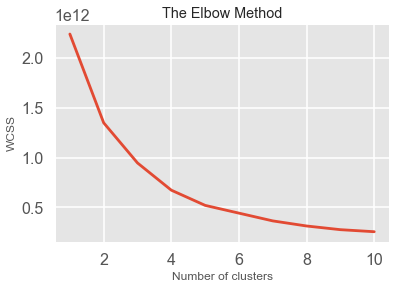

In [139]:
#cluster_data=cleaned_data[(cleaned_data.yearOfRegistration >= 2015) & 
#                                (cleaned_data.yearOfRegistration <= 2017)]
#cluster_data=cleaned_data[['price','kilometer','yearsOld']]

X=cluster_data

#X.info()
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [129]:
# Lets apply k-means on scaled data and check the silhouette score
cluster_count = 4
model = KMeans(n_clusters=cluster_count)
kmeans = model.fit(X)
label = kmeans.labels_
sil_coeff = silhouette_score(X, label, metric='euclidean')
scores = kmeans.score(X)
print (scores)
print("Number of Clusters = {}, The Silhouette Coefficient is {}".format(cluster_count, sil_coeff))

-674029389722.5808
Number of Clusters = 4, The Silhouette Coefficient is 0.4239666099730904


In [141]:
# This is to print the label per point for K-means clusters
predict_label_per_point = model.predict(X)
import collections
collections.Counter(predict_label_per_point)

Counter({3: 672, 1: 1129, 0: 2405, 2: 96})

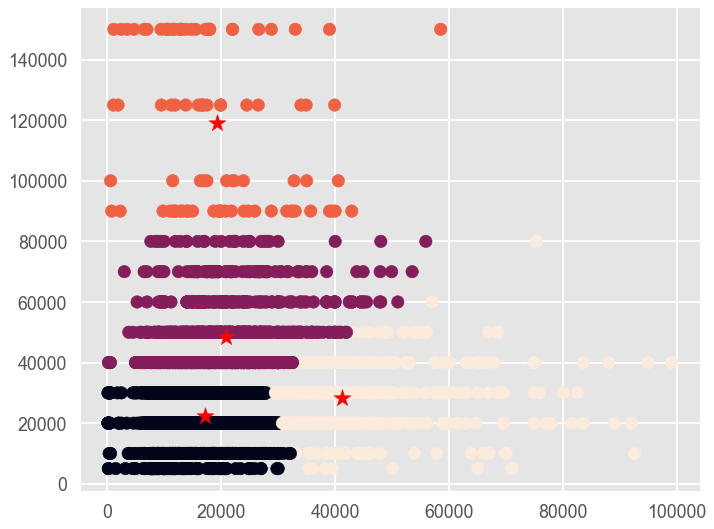

In [153]:
color_map=['red', 'lightgreen', 'lightblue','magenta']
import matplotlib.pyplot as plt
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=predict_label_per_point)
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],s=250, c='red', marker='*');
plt.show()

In [53]:
#above graph says optimal k is 4
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

cluster_data["cluster"] = 4-y_kmeans
cols = list(cluster_data.columns)

# <b>Principal Component Analysis[PCA]</b>
<br>
We are using the PCA to reduce our dataset into a lower dimensions while retaining the variation present in the dataset, up to the maximum extent.Intuitively, Principal Component Analysis provide us with a lower-dimensional picture, a projection or "shadow" of this object when viewed from its most informative viewpoint.


C:\Users\PB\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\PB\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


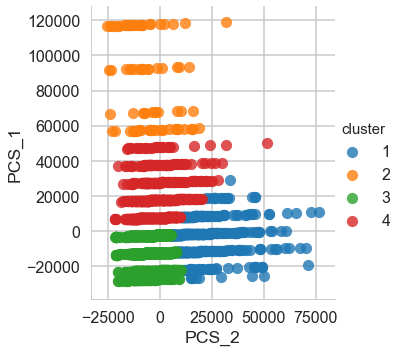

In [54]:
X = cluster_data.iloc[:, :-1]
Y = cluster_data['cluster']

from sklearn.preprocessing import StandardScaler
col_names = ['price','kilometer']
X_std = X.copy()
features = X_std[col_names]
scaler = StandardScaler().fit_transform(features.values)
X_std[col_names] = features

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

cluster_data["PCS_1"] = Y_sklearn[:,0]
cluster_data["PCS_2"] = Y_sklearn[:,1]
sns.lmplot("PCS_2","PCS_1", data=cluster_data, hue='cluster',fit_reg=False)

plt.show()

# Gaussian Mixture Model
1.Perform clustering using GMM and hierarchical clustering methods.
<br>
2.Use Gaussian mixture model as a generative model and generate samples similar to given dataset.
<br>
3.Evaluate the clusters and compare the performance of k-means, GMM & hierarchical clustering.
<br>
4.Report any new findings.
<br>


<b>Bayesian Information Criterion and Akaike Information criterion</b>
<br>
We used elbow method in k-means clustering to find the optimal number of components.
<br>
If we observe the elbow method, the score continues to increase with increase in number of clusters. However it does not mean its optimal to increase the number of clusters.
<br>
While clustering, its possible to achieve lesser loss or higher score simply by increasing the number of components.
<br>
Metric like Bayesian Information Criterion and Akaike Information criterion prevents overfitting.[courtesy:wikipedia]
<br>
From the plot below, we can see, AIC and BIC curve seem to diverge from number_of_components=4 (x-axis).


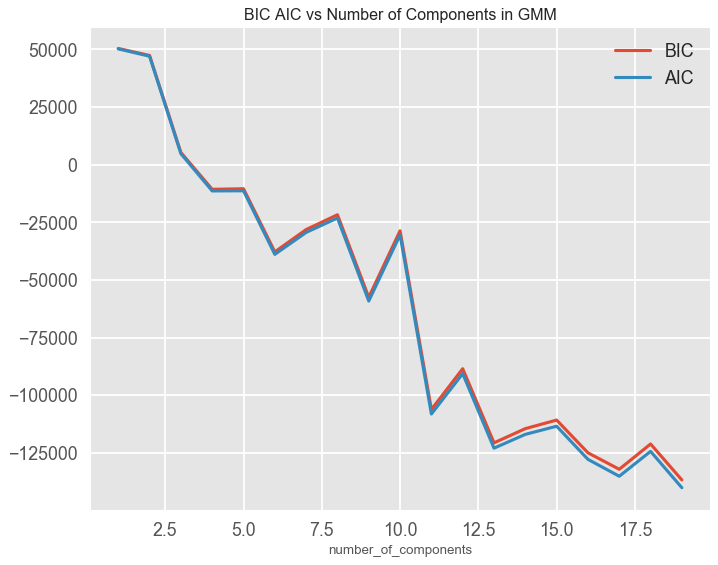

In [120]:
# By running a comparison of AIC vs BIC on our data, we come to a conclusion that number of ideal clusters would be 
gmm_models = [GaussianMixture(n_components=i,
                              covariance_type='full',max_iter=5000).fit(cluster_data.values) 
              for i in range(1,20)] 
n_components = [i for i in range(1,20)]
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(n_components, [m.bic(cluster_data.values) for m in gmm_models], label='BIC')
plt.plot(n_components, [m.aic(cluster_data.values) for m in gmm_models], label='AIC')
plt.title("BIC AIC vs Number of Components in GMM")
plt.legend(loc='best')
plt.xlabel('number_of_components');

In [56]:
from matplotlib.patches import Ellipse
import numpy as np
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    #ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

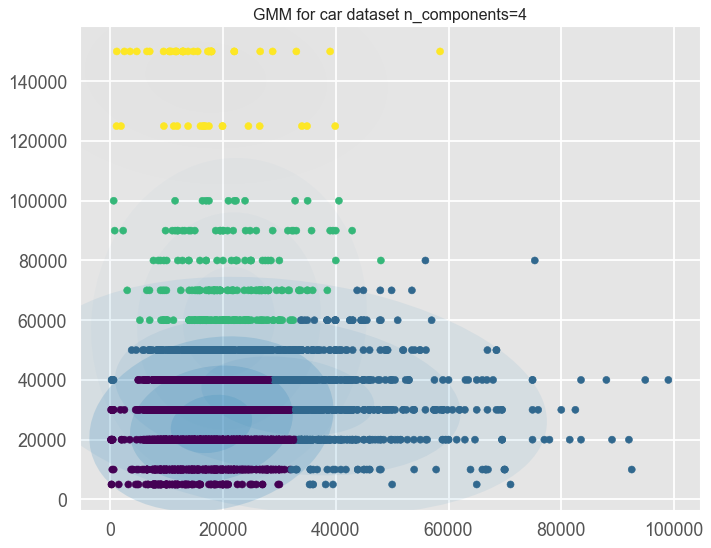

In [119]:
# from the analysis, we determined that the number of components is 4
number_of_components=4
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=number_of_components,covariance_type='full',verbose=0,verbose_interval=10,
                      max_iter=5000).fit(cluster_data.values)
labels = gmm.predict(cluster_data.values)
test_features= ['price','kilometer']
X = cluster_data[test_features].values
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap='viridis');
plt.title("GMM for car dataset n_components=4")
plot_gmm(gmm,X)

GMM is a mixture of normal distributions where the parameters of each normal distribution are mean and variance. 
<br>
After fitting a gaussian mixture model, we were able to use it as a generative model.
<br>
We  generated random 1000 data points for 4 components that resembled the original dataset.
<br>


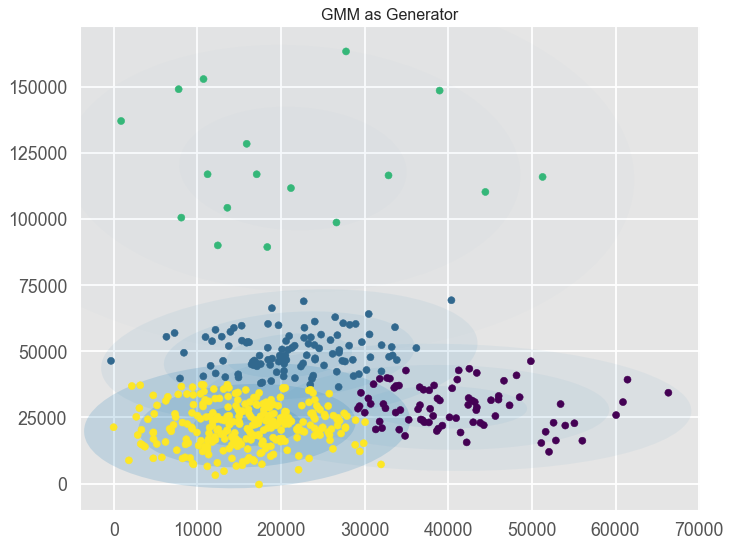

In [118]:
#density estimation using GMM as generator
gmm = GaussianMixture(n_components=number_of_components,covariance_type='full', random_state=0)
model = gmm.fit(cluster_data.values)
(genX, genY) = model.sample(500)
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(genX[:,0], genX[:,1],c=genY,s=10,cmap='viridis')
test_features= ['price','kilometer']
X = cluster_data[test_features].values
plt.title("GMM as Generator")
genX = genX[:,[0,1]]
plot_gmm(gmm,genX)

Text(0,0.5,'kilometer')

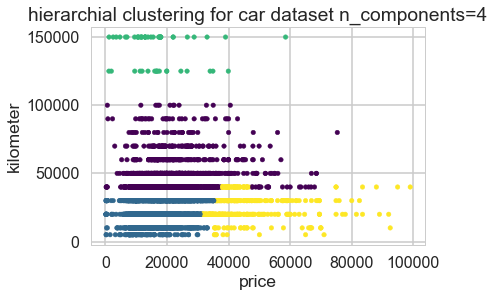

In [59]:
#Hierarchial Clustering using AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
HC = AgglomerativeClustering(n_clusters=number_of_components, linkage='ward')
HC.fit(cluster_data.values)
test_features= ['price','kilometer']
X = cluster_data[test_features].values
plt.scatter(X[:, 0], X[:, 1], c=HC.labels_, s=20, cmap='viridis');
plt.title("hierarchial clustering for car dataset n_components=4")
plt.xlabel("price")
plt.ylabel("kilometer")

Comparing silhoutte score K means, GMM, Hierarchial Clustering for 4 components

In [60]:
from sklearn.metrics import silhouette_score
silhoutte_coefficients = []
gmm = GaussianMixture(n_components=number_of_components,covariance_type='spherical',verbose=0,
                      verbose_interval=10,max_iter=5000).fit(cluster_data.values)
gmm_labels = gmm.predict(cluster_data.values)
gmm_silhoute_score = silhouette_score(cluster_data, gmm_labels, metric='euclidean')

kmeans = KMeans( init='k-means++',n_clusters=number_of_components)
kmeans_model = kmeans.fit(cluster_data)
kmeans_labels = kmeans_model.labels_
kmeans_silhoute_score = silhouette_score(cluster_data, kmeans_labels, metric='euclidean')

HC = AgglomerativeClustering(n_clusters=number_of_components, linkage='ward')
HC.fit(cluster_data.values)
HC_silhoute_score = silhouette_score(cluster_data, HC.labels_, metric='euclidean')

print ("Silhoutte score for Kmeans:",kmeans_silhoute_score, "GMM:", gmm_silhoute_score, 
       "Hierarchial Clustering:",HC_silhoute_score)

Silhoutte score for Kmeans: 0.41495016662843737 GMM: 0.34195607772767533 Hierarchial Clustering: 0.41750279572741084


# Simple Linear Regression
Linear regression attempts to model the relationship between two features by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable. For example,in our case,  a modeler want to relate the kilometer driven on the Car to its Price using a linear regression model.
<br>
A linear regression line has an equation of the form Y = c + mX, where X is the explanatory variable and Y is the dependent variable. The slope of the line is m, and c is the intercept (the value of y when x = 0).


In [61]:
super_cleaned_data.head(5)

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,date_crawled,year_registered,month_registered,date_crawled_year,yearsOld,kodemonkeysrecommended,expense_range
3,1500,smallcar,manual,75,golf,150000,petrol,volkswagen,no,2016-03-17 00:00:00,91074,2016-03-17 17:40:17,2016-03-17 16:54:04,2001,6,2016,15,0,less_expensive
4,3600,smallcar,manual,69,fabia,90000,diesel,skoda,no,2016-03-31 00:00:00,60437,2016-04-06 10:17:21,2016-03-31 17:25:20,2008,7,2016,8,1,mid_low_expensive
5,650,van,manual,102,3er,150000,petrol,bmw,yes,2016-04-04 00:00:00,33775,2016-04-06 19:17:07,2016-04-04 17:36:23,1995,10,2016,21,0,less_expensive
6,2200,cabrio,manual,109,2_reihe,150000,petrol,peugeot,no,2016-04-01 00:00:00,67112,2016-04-05 18:18:39,2016-04-01 20:48:51,2004,8,2016,12,0,mid_low_expensive
10,2000,van,manual,105,3_reihe,150000,petrol,mazda,no,2016-03-26 00:00:00,96224,2016-04-06 10:45:34,2016-03-26 19:54:18,2004,12,2016,12,0,mid_low_expensive


In [62]:
LRreg_label_field = ['price']
LRreg_training_fields = ['yearsOld']

In [63]:
# WE took the Age of the car as X component and our target variable being the price
Y = super_cleaned_data[LRreg_label_field]
X = super_cleaned_data[LRreg_training_fields]

In [64]:
# Split X and y into X_
# since the data is highly skewed, we assume for the low prediction, may be log transformation of data may lead to better prediction
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

LR_reg = LinearRegression()
LR_reg.fit(X_train, y_train)
LR_reg.score(X_test, y_test)

0.22302529154820971

We got accuracy of 34.7% when we used age of the car against our target variable price

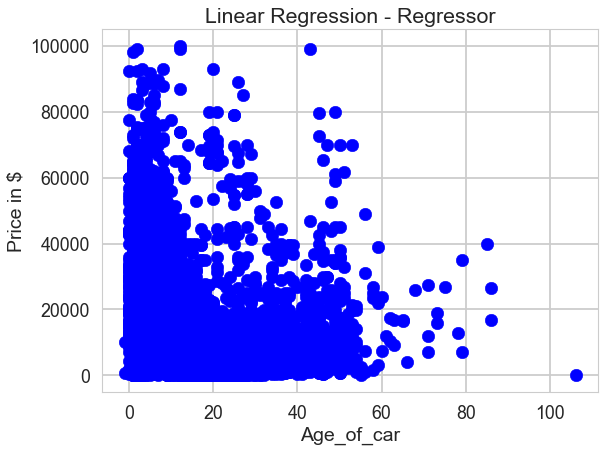

In [66]:
y_pred = LR_reg.predict(X_test) 

# from matplotlib.pyplot import figure
# figure(num=None, figsize=(10, 8), dpi=50, facecolor='w', edgecolor='k')
# plt.scatter(y_test, y_pred, color = 'blue')
# plt.xlabel("Age_of_Car")
# plt.ylabel("Price")
# plt.title("Age_of_Car vs Price");

from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(X_test, y_test, c='b')
plt.title("Linear Regression - Regressor")
plt.xlabel("Age_of_car")
plt.ylabel("Price in $")
plt.show()

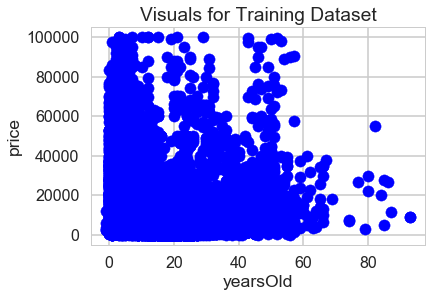

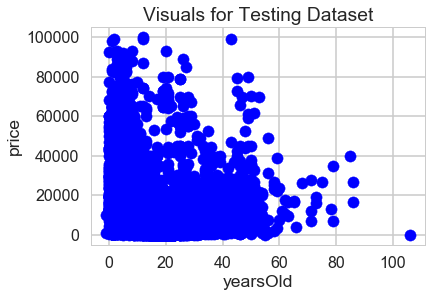

In [68]:
y_pred = LR_reg.predict(X_train) 

#Visualizing the training Test Results 
plt.scatter(X_train, y_train, color= 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("yearsOld")
plt.ylabel("price")
plt.show()

#Visualizing the Test Results 
plt.scatter(X_test, y_test, color= 'blue')
plt.title ("Visuals for Testing Dataset")
plt.xlabel("yearsOld")
plt.ylabel("price")
plt.show()

In [69]:
lm  = LinearRegression()

#lm.fit(X_train, y_train)

model = sm.OLS(y_test, X_test)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                 1.519e+04
Date:                Wed, 24 Oct 2018   Prob (F-statistic):               0.00
Time:                        18:49:12   Log-Likelihood:            -7.8709e+05
No. Observations:               74364   AIC:                         1.574e+06
Df Residuals:                   74363   BIC:                         1.574e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
yearsOld     307.1640      2.492    123.239      0.000     302.279     312.049
==============================================================================
Omnibus:                    39389.499   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           376547.148
Skew:                           2.380   Prob(JB):                         0.00
Kurtosis:                      12.943   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Multiple Linear Regression
<br>
Since the linear regression did not yeild the desired output, we tried to see the result using multiple linear regression
<br>
the X component is now enhanced with new columns "years Old" and power of the car

In [70]:
cleaned_data_numeric.describe()
cleaned_data_numeric.head(3)

,price,powerPS,kilometer,date_crawled_year,yearsOld,expense_range
3,1500,75,150000,2016,15,less_expensive
4,3600,69,90000,2016,8,mid_low_expensive
5,650,102,150000,2016,21,less_expensive


In [71]:
import sklearn.cross_validation

#loading numeric data 

sklearn.model_selection.train_test_split
X123 = cleaned_data_numeric.drop(['price','expense_range'], axis = 1)
Y123 = cleaned_data_numeric ['price']

(173515, 4)
(74364, 4)
(173515,)
(74364,)
Coefficients: 
 [ 7.05919795e+01 -7.64042334e-02  0.00000000e+00 -2.43875011e+02]
Variance score: 0.5906693807986593


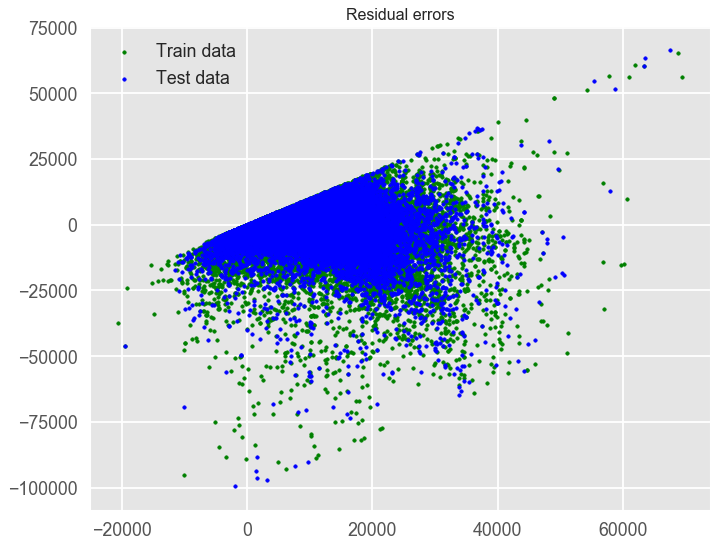

In [72]:
#data Splitting

X_train1, X_test1, Y_train1, Y_test1 = sklearn.cross_validation.train_test_split(X123, Y123, test_size = 0.3, random_state = 5)
print(X_train1.shape)
print(X_test1.shape)
print(Y_train1.shape)
print(Y_test1.shape)

#Multivariate linear regression: 

from matplotlib.pyplot import figure

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train1, Y_train1)

Y_pred_pr = lm.predict(X_test1)

# regression coefficients
print('Coefficients: \n', lm.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(lm.score(X_test1, Y_test1)))

#Plot residual error
plt.style.use('ggplot')

#training data
plt.scatter(lm.predict(X_train1), lm.predict(X_train1) - Y_train1,
            color = "green", s = 10, label = 'Train data')

#test data
plt.scatter(lm.predict(X_test1), lm.predict(X_test1) - Y_test1,
            color = "blue", s = 10, label = 'Test data')

# plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)

# plotting legend
plt.legend(loc = 'upper left')

# plot title
plt.title("Residual errors")
plt.show()

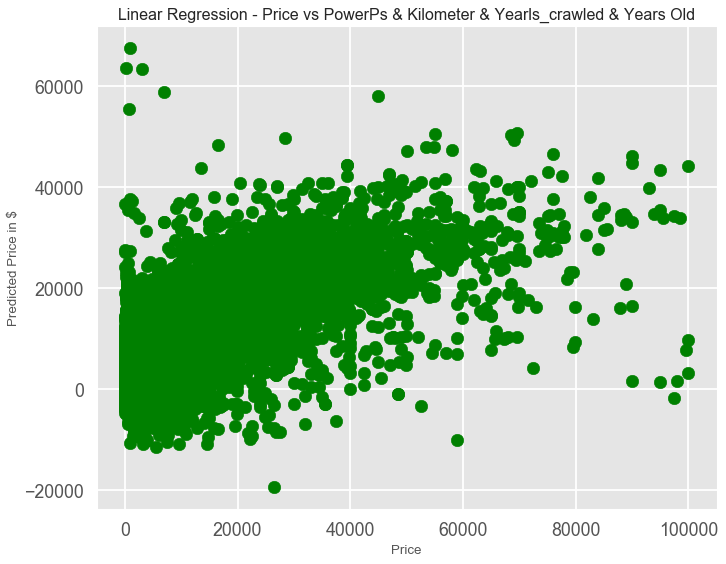

In [73]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(Y_test1, Y_pred_pr, c='g')
#plt.scatter(X_train, y_train)
#plt.plot(X_dis_test, pred_mul, c='r')
plt.title("Linear Regression - Price vs PowerPs & Kilometer & Yearls_crawled & Years Old")
plt.xlabel("Price")
plt.ylabel("Predicted Price in $")
plt.show()

In [74]:
MLRmodel = sm.OLS(Y_test1,X_test1)
result = MLRmodel.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                 3.579e+04
Date:                Wed, 24 Oct 2018   Prob (F-statistic):               0.00
Time:                        18:49:27   Log-Likelihood:            -7.4048e+05
No. Observations:               74364   AIC:                         1.481e+06
Df Residuals:                   74360   BIC:                         1.481e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
powerPS              69.3588      0.310    223.845      0.000      68.752      69.966
kilometer            -0.0755      0.001   -145.028      0.000      -0.076      -0.074
date_crawled_year     5.1400      0.038    135.516      0.000       5.066       5.214
yearsOld           -257.9229      3.339    -77.240      0.000    -264.468    -251.378
==============================================================================
Omnibus:                    57694.596   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3835725.737
Skew:                           3.206   Prob(JB):                         0.00
Kurtosis:                      37.595   Cond. No.                     2.32e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Logistic Regression
The original dataset was intended for predicting the price of the used-car. It was a regression problem. We reformulated it into a classification problem. 
<br>
We took the percentile range of values for price and classified the target variable 'expense_range'
<br>

Creating categorical variables using One-hot-encoding
<br>
There were several categorical variables like
<br>
Fuel type
<br>
Gear box type
<br>
Vehicle type 
<br>
Model
<br>
Brand
<br>
Had it been repaired?
<br>
We used a technique called one-hot-encoding to convert these categorical variables into a set of boolean features for the Logistic Regression.
<br>


In [75]:
cleaned_data_numeric.head(2)

,price,powerPS,kilometer,date_crawled_year,yearsOld,expense_range
3,1500,75,150000,2016,15,less_expensive
4,3600,69,90000,2016,8,mid_low_expensive


In [76]:
cleaned_data_numeric.expense_range = pd.Categorical(cleaned_data_numeric.expense_range)
cleaned_data_numeric['expense_range_code'] = cleaned_data_numeric.expense_range.cat.codes
cleaned_data_numeric.head(5)

,price,powerPS,kilometer,date_crawled_year,yearsOld,expense_range,expense_range_code
3,1500,75,150000,2016,15,less_expensive,1
4,3600,69,90000,2016,8,mid_low_expensive,3
5,650,102,150000,2016,21,less_expensive,1
6,2200,109,150000,2016,12,mid_low_expensive,3
10,2000,105,150000,2016,12,mid_low_expensive,3


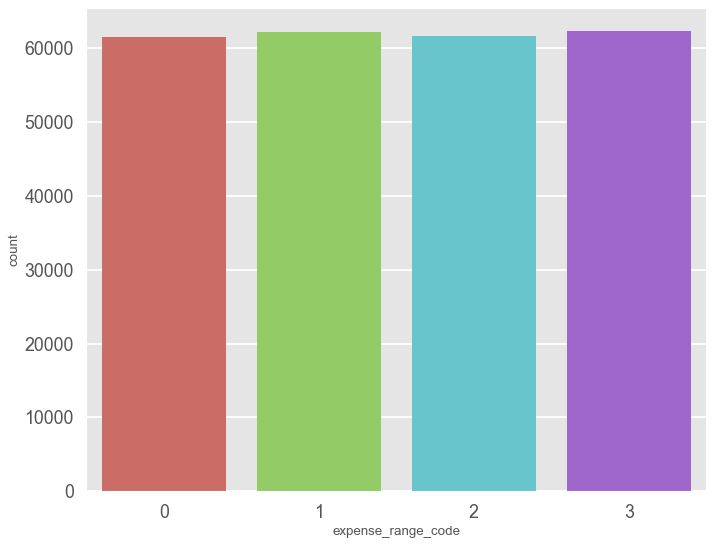

In [77]:
Xlog = cleaned_data_numeric.drop(['expense_range','expense_range_code'], axis = 1)
Ylog = cleaned_data_numeric ['expense_range_code']

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
ax = sns.countplot(x="expense_range_code", data=cleaned_data_numeric, palette ='hls')
plt.show()


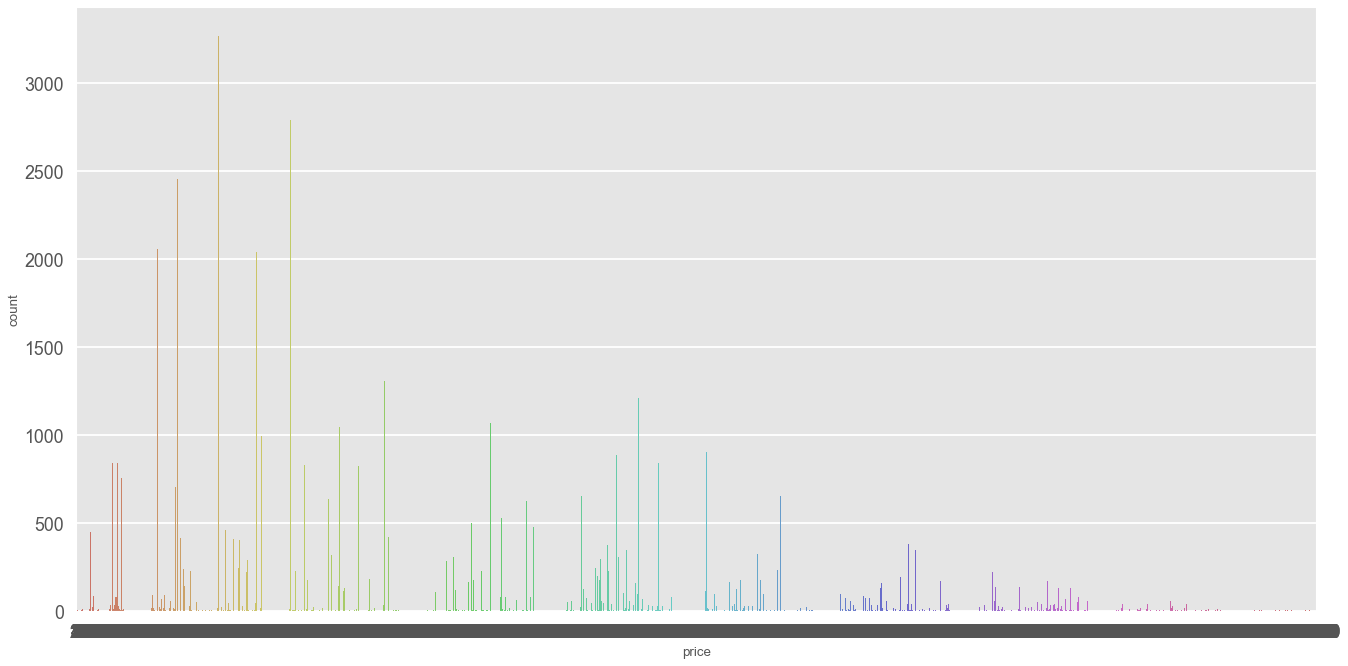

In [80]:
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
ax = sns.countplot(x="price", data=cleaned_data_numeric, palette ='hls')

# Applying sigmoid Function

[7.14248671 1.12930053]


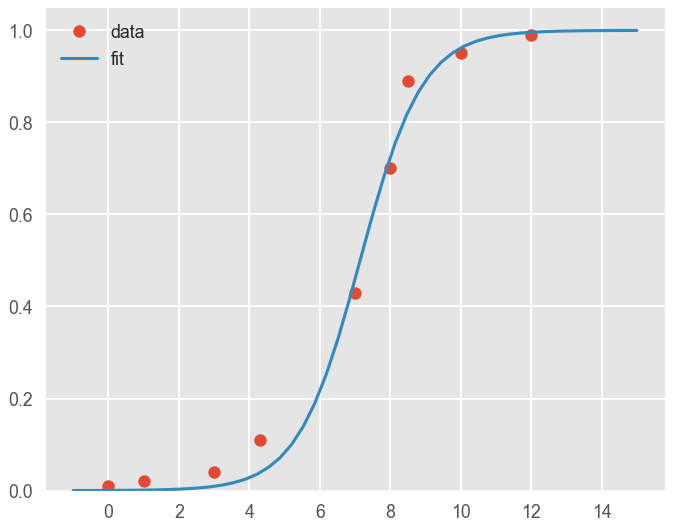

In [117]:
#Apply sigmoiod Function

from scipy.optimize import curve_fit

def sigmoid(x, x0, k):
     y = 1 / (1 + np.exp(-k*(x-x0)))
     return y

xdata = np.array([0.0,   1.0,  3.0, 4.3, 7.0,   8.0,   8.5, 10.0, 12.0])
ydata = np.array([0.01, 0.02, 0.04, 0.11, 0.43,  0.7, 0.89, 0.95, 0.99])
#ydata = dis_x
#xdata = np.array([dis_y])

popt, pcov = curve_fit(sigmoid, xdata, ydata)
print (popt)

x = np.linspace(-1, 15, 50)
y = sigmoid(x, *popt)
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.plot(xdata, ydata, 'o', label='data')
plt.plot(x,y, label='fit')
plt.ylim(0, 1.05)
plt.legend(loc='best')
plt.show()

In [82]:
print(super_cleaned_data['fuelType'].unique())

['petrol' 'diesel' 'lpg' 'other' 'hybrid' 'cng' 'electric']


In [83]:
super_cleaned_data['gearbox_category'] = super_cleaned_data['gearbox'].apply(lambda x: 0 if (x == 'manual') else 1)


final_data = super_cleaned_data;
# there are 7 unique fuel types, we can create a categorical variable for each one of them
#array(['benzin', 'diesel', 'lpg', 'other', 'hybrid', 'cng', 'electric'],
final_data['benzin'] = final_data['fuelType'].apply(lambda x : 1 if (x == 'benzin') else 0)
final_data['diesel'] = final_data['fuelType'].apply(lambda x : 1 if (x == 'diesel') else 0)
final_data['lpg'] = final_data['fuelType'].apply(lambda x : 1 if (x == 'lpg') else 0)
final_data['other'] = final_data['fuelType'].apply(lambda x : 1 if (x == 'other') else 0)
final_data['hybrid'] = final_data['fuelType'].apply(lambda x : 1 if (x == 'hybrid') else 0)
final_data['cng'] = final_data['fuelType'].apply(lambda x : 1 if (x == 'cng') else 0)
final_data['electric'] = final_data['fuelType'].apply(lambda x : 1 if (x == 'electric') else 0)

In [84]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247879 entries, 3 to 371527
Data columns (total 27 columns):
price                     247879 non-null int64
vehicleType               247879 non-null object
gearbox                   247879 non-null object
powerPS                   247879 non-null int64
model                     247879 non-null object
kilometer                 247879 non-null int64
fuelType                  247879 non-null object
brand                     247879 non-null object
notRepairedDamage         247879 non-null object
dateCreated               247879 non-null object
postalCode                247879 non-null int64
lastSeen                  247879 non-null object
date_crawled              247879 non-null datetime64[ns]
year_registered           247879 non-null object
month_registered          247879 non-null object
date_crawled_year         247879 non-null int64
yearsOld                  247879 non-null int64
kodemonkeysrecommended    247879 non-null int64
expens

In [85]:
print(super_cleaned_data['vehicleType'].unique())

['smallcar' 'van' 'cabrio' 'Midsize' 'suv' 'bus' 'coupe' 'other']


In [86]:
# there are 8 unique vehicle types. We can create a categorical variable for each one of them
final_data['smallcar'] = final_data['vehicleType'].apply(lambda x : 1 if (x == 'smallcar') else 0)
final_data['cabrio'] = final_data['vehicleType'].apply(lambda x : 1 if (x == 'cabrio') else 0)
final_data['van'] = final_data['vehicleType'].apply(lambda x : 1 if (x == 'van') else 0)
final_data['Midsize'] = final_data['vehicleType'].apply(lambda x : 1 if (x == 'Midsize') else 0)
final_data['suv'] = final_data['vehicleType'].apply(lambda x : 1 if (x == 'suv') else 0)
final_data['bus'] = final_data['vehicleType'].apply(lambda x : 1 if (x == 'bus') else 0)
final_data['coupe'] = final_data['vehicleType'].apply(lambda x : 1 if (x == 'coupe') else 0)
final_data['VehicleTypeother'] = final_data['vehicleType'].apply(lambda x : 1 if (x == 'other') else 0)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247879 entries, 3 to 371527
Data columns (total 35 columns):
price                     247879 non-null int64
vehicleType               247879 non-null object
gearbox                   247879 non-null object
powerPS                   247879 non-null int64
model                     247879 non-null object
kilometer                 247879 non-null int64
fuelType                  247879 non-null object
brand                     247879 non-null object
notRepairedDamage         247879 non-null object
dateCreated               247879 non-null object
postalCode                247879 non-null int64
lastSeen                  247879 non-null object
date_crawled              247879 non-null datetime64[ns]
year_registered           247879 non-null object
month_registered          247879 non-null object
date_crawled_year         247879 non-null int64
yearsOld                  247879 non-null int64
kodemonkeysrecommended    247879 non-null int64
expens

In [87]:
# there are 35+ models, we take top models only
final_data['golf'] = final_data['model'].apply(lambda x : 1 if (x == 'golf') else 0)
final_data['fabia'] = final_data['model'].apply(lambda x : 1 if (x == 'fabia') else 0)
final_data['3er'] = final_data['model'].apply(lambda x : 1 if (x == '3er') else 0)
final_data['polo'] = final_data['model'].apply(lambda x : 1 if (x == 'polo') else 0)
final_data['corsa'] = final_data['model'].apply(lambda x : 1 if (x == 'corsa') else 0)
final_data['a4'] = final_data['model'].apply(lambda x : 1 if (x == 'a4') else 0)
final_data['passat'] = final_data['model'].apply(lambda x : 1 if (x == 'passat') else 0)
final_data['astra'] = final_data['model'].apply(lambda x : 1 if (x == 'astra') else 0)
final_data['5er'] = final_data['model'].apply(lambda x : 1 if (x == '5er') else 0)
final_data['c_klasse'] = final_data['model'].apply(lambda x : 1 if (x == 'c_klasse') else 0)

In [88]:
final_data['volkswagen'] = final_data['brand'].apply(lambda x : 1 if (x == 'volkswagen') else 0)
final_data['bmw'] = final_data['brand'].apply(lambda x : 1 if (x == 'bmw') else 0)
final_data['mercedes_benz'] = final_data['brand'].apply(lambda x : 1 if (x == 'mercedes_benz') else 0)
final_data['skoda'] = final_data['brand'].apply(lambda x : 1 if (x == 'skoda') else 0)

final_data['opel'] = final_data['brand'].apply(lambda x : 1 if (x == 'opel') else 0)
final_data['audi'] = final_data['brand'].apply(lambda x : 1 if (x == 'audi') else 0)

final_data['ford'] = final_data['brand'].apply(lambda x : 1 if (x == 'ford') else 0)
final_data['renault'] = final_data['brand'].apply(lambda x : 1 if (x == 'renault') else 0)
final_data['porsche'] = final_data['brand'].apply(lambda x : 1 if (x == 'porsche') else 0)
final_data['jaguar'] = final_data['brand'].apply(lambda x : 1 if (x == 'jaguar') else 0)


final_data['repaired'] = final_data['notRepairedDamage'].apply(lambda x : 0 if (x=='nein') else 1)
final_data['peugeot'] = final_data['brand'].apply(lambda x : 1 if (x == 'peugeot') else 0)
final_data['fiat'] = final_data['brand'].apply(lambda x : 1 if (x == 'fiat') else 0)
final_data['seat'] = final_data['brand'].apply(lambda x : 1 if (x == 'seat') else 0)
final_data['toyota'] = final_data['brand'].apply(lambda x : 1 if (x == 'toyota') else 0)
final_data['nissan'] = final_data['brand'].apply(lambda x : 1 if (x == 'nissan') else 0)
final_data['kia'] = final_data['brand'].apply(lambda x : 1 if (x == 'kia') else 0)

In [89]:
final_data['oldandheavilyUsed'] = final_data['yearsOld'] * final_data['kilometer']

final_data['oldandheavilyUsedAndDamaged'] = final_data['yearsOld'] * final_data['kilometer'] * final_data['repaired']

# Feature Scaling

In [90]:
#feature scaling

#Classifying our target variable "expense range" based on below setup
#less expensive: When the price is between (0,1690) 
#mid low expensive: When the price is between (1691,3999) 
#mid high expensive: When the price is between (4000,8900) 
#expensive: Any car costing more than 8901 EUR is tagged as less expensive 

from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
data.dtypes
label_field = ['expense_range']
Y = final_data[label_field]
training_fields = ['powerPS', 'kilometer', 'yearsOld', 'repaired','kodemonkeysrecommended']
training_fields = ['oldandheavilyUsedAndDamaged','peugeot', 'kia',
                   'fiat','seat','toyota','nissan','skoda','jaguar','porsche','oldandheavilyUsed',
                   'powerPS', 'kilometer', 'yearsOld', 'gearbox_category',"benzin","diesel","lpg",
                   "other","hybrid","cng","electric","smallcar","cabrio","van","Midsize","VehicleTypeother",
                   "suv","bus","coupe","golf","fabia","3er","polo","corsa","a4","passat","astra",
                   "5er","c_klasse","volkswagen","bmw","mercedes_benz","opel","audi","ford","renault","repaired",
                   "kodemonkeysrecommended"]

X = final_data[training_fields]
scaled_X = scaler.fit_transform(X)


le = LabelEncoder()
le.fit(Y['expense_range'].astype(str))
Y['expense_range'] = le.transform(Y['expense_range'].astype(str))

Y_label = pd.DataFrame(Y, columns=label_field)
scaled_X = pd.DataFrame(scaled_X, columns=training_fields)
X.head()

,oldandheavilyUsedAndDamaged,peugeot,kia,fiat,seat,toyota,nissan,skoda,jaguar,porsche,...,c_klasse,volkswagen,bmw,mercedes_benz,opel,audi,ford,renault,repaired,kodemonkeysrecommended
3,2250000,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,720000,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
5,3150000,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,1800000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10,1800000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [92]:
X_all= scaled_X[training_fields[1:]]

In [93]:
from sklearn import utils
print(utils.multiclass.type_of_target(Y))

multiclass


# Data Enrichment :
<br>
Data enrichment has been done using data from "https://vincentarelbundock.github.io/Rdatasets/csv/ggplot2/mpg.csv". The dataset contains additional fields like highway/city mileage, drive train. These are good indicators to determine if a car's suitability for certain purposes like if the car is a good commuter car, if it is useful for families or if a car can be used for snowy terrain. Cars that have 4 wheel drive have a smoother drive and can be used for snowy terrain. Rear wheel drives are smooth but more expensive that front wheel drive. Our data has been enriched based on brand and model with this additional dataset

In [94]:
new_data=pd.read_csv('C://PUJAMS//machinelearning//csvfiles//mpg.csv',encoding='Latin1')

In [95]:
enriched_data = pd.merge(final_data, new_data, left_on=['brand', 'model'], right_on=['manufacturer', 'model'])
enriched_data.head(5)

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,dateCreated,...,manufacturer,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,2799,Midsize,manual,140,passat,150000,diesel,volkswagen,yes,2016-04-07 00:00:00,...,volkswagen,1.8,1999,4,manual(m5),f,21,29,p,midsize
1,2799,Midsize,manual,140,passat,150000,diesel,volkswagen,yes,2016-04-07 00:00:00,...,volkswagen,1.8,1999,4,auto(l5),f,18,29,p,midsize
2,2799,Midsize,manual,140,passat,150000,diesel,volkswagen,yes,2016-04-07 00:00:00,...,volkswagen,2.0,2008,4,auto(s6),f,19,28,p,midsize
3,2799,Midsize,manual,140,passat,150000,diesel,volkswagen,yes,2016-04-07 00:00:00,...,volkswagen,2.0,2008,4,manual(m6),f,21,29,p,midsize
4,2799,Midsize,manual,140,passat,150000,diesel,volkswagen,yes,2016-04-07 00:00:00,...,volkswagen,2.8,1999,6,auto(l5),f,16,26,p,midsize


Training test set split:
<br>
We splitted the dataset into training set and testing set with 60% and 40% split.
<br>

In [100]:
from sklearn import linear_model
X_train, X_test, y_train, y_test = train_test_split(X_all, Y, test_size=0.4, random_state=5)

logreg = linear_model.LogisticRegression(verbose=1)
model = logreg.fit(X_train, y_train)
print (model)
y_pred = logreg.predict(X_test)

print("Accuracy is ", accuracy_score(y_test,y_pred)*100)

C:\Users\PB\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibLinear]LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=1, warm_start=False)
Score: 0.6676416007745684
Accuracy is  66.76416007745684


We got accuracy of 66.74%

In [101]:
predictions = logreg.predict(X_test)
true_positives = 1.0
false_positives = 1.0
true_negatives = 1.0
false_negatives = 1.0
for i in range(0, len(y_test.values)):
    if (y_test.values[i] == predictions[i]):
        if (predictions[i] == 1.0):
            true_positives+=1.0
        else:
            true_negatives+=1.0
    else:
        if (predictions[i] == 1.0):
            false_positives += 1.0
        else:
            false_negatives += 1.0
            
print ("True positives:", true_positives)
print ("False positives:", false_positives)

print ("True Negatives:", true_negatives)
print ("False Negatives:", false_negatives)
prec = true_positives / (true_positives  + false_positives)
recall_score = true_positives / (true_positives  + false_negatives)
print ("precision:", prec)
print ("recall:", recall_score)
f1score = 2 * prec * recall_score / (prec + recall_score)
print ("f1score:", f1score)

True positives: 20782.0
False positives: 10439.0
True Negatives: 45418.0
False Negatives: 22517.0
precision: 0.6656417155119951
recall: 0.47996489526317004
f1score: 0.5577563070316693


# Decision Tree
Build a decision tree classifier to predict a categorical variable in the given dataset and build a story around our dataset.
<br>
The way Decision Tree algorithm works is that it looks at our entire dataset, looks at all the features in it and then it asks: “Which one of these features can I split at a certain point that will give me the greatest separation between my different classes that I’m trying to classify?”   Then it repeats this process over and over, trying to achieve a goal of getting everyone of our individual classes into its own terminal node.
<br>


# Decision Tree with criterion as gini index

In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
X_train, X_test, y_train, y_test = train_test_split(X_all, Y, test_size=0.4, random_state=0)

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

<b>Visualization of the Decision Tree with criterion as gini index</b>

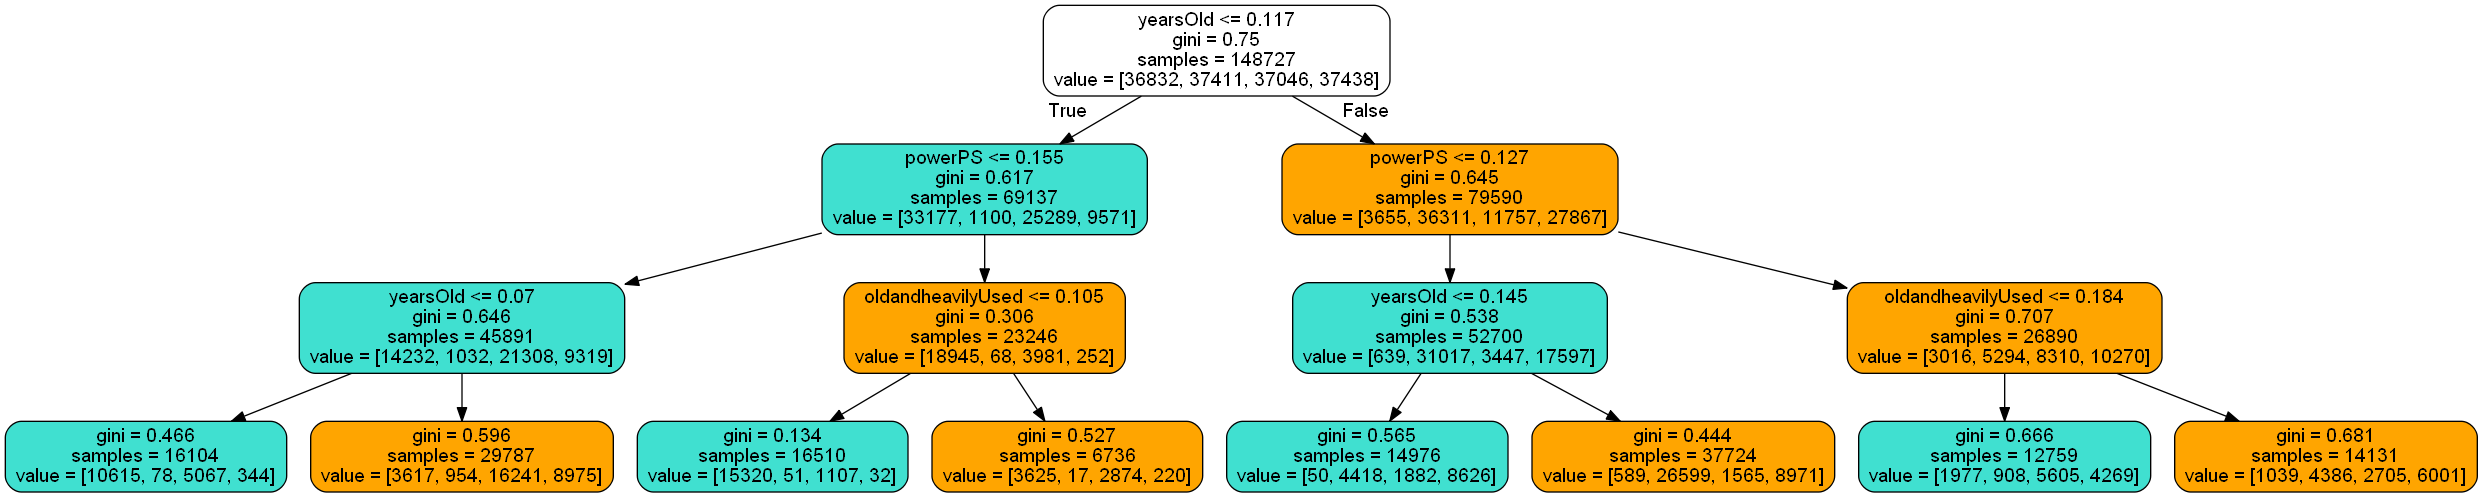

In [103]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

data_feature_names=X_all.columns

dot_data = tree.export_graphviz(clf_gini,
                                feature_names=data_feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')
Image(graph.create_png())

In [104]:
y_pred = clf_gini.predict(X_test)
y_pred

array([2, 0, 0, ..., 1, 3, 1], dtype=int64)

In [105]:
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  62.315434887848966


In [106]:
predictions = clf_gini.predict(X_test)
true_positives = 1.0
false_positives = 1.0
true_negatives = 1.0
false_negatives = 1.0
for i in range(0, len(y_test.values)):
    if (y_test.values[i] == predictions[i]):
        if (predictions[i] == 1.0):
            true_positives+=1.0
        else:
            true_negatives+=1.0
    else:
        if (predictions[i] == 1.0):
            false_positives += 1.0
        else:
            false_negatives += 1.0
            
print ("True positives:", true_positives)
print ("False positives:", false_positives)

print ("True Negatives:", true_negatives)
print ("False Negatives:", false_negatives)
prec = true_positives / (true_positives  + false_positives)
recall_score = true_positives / (true_positives  + false_negatives)
print ("precision:", prec)
print ("recall:", recall_score)
f1score = 2 * prec * recall_score / (prec + recall_score)
print ("f1score:", f1score)

True positives: 17445.0
False positives: 7476.0
True Negatives: 44344.0
False Negatives: 29891.0
precision: 0.7000120380402071
recall: 0.36853557546053745
f1score: 0.4828597921308662


# Decision Tree with criterion as information gain

In [107]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

Visualization of the Decision Tree with criterion as information gain

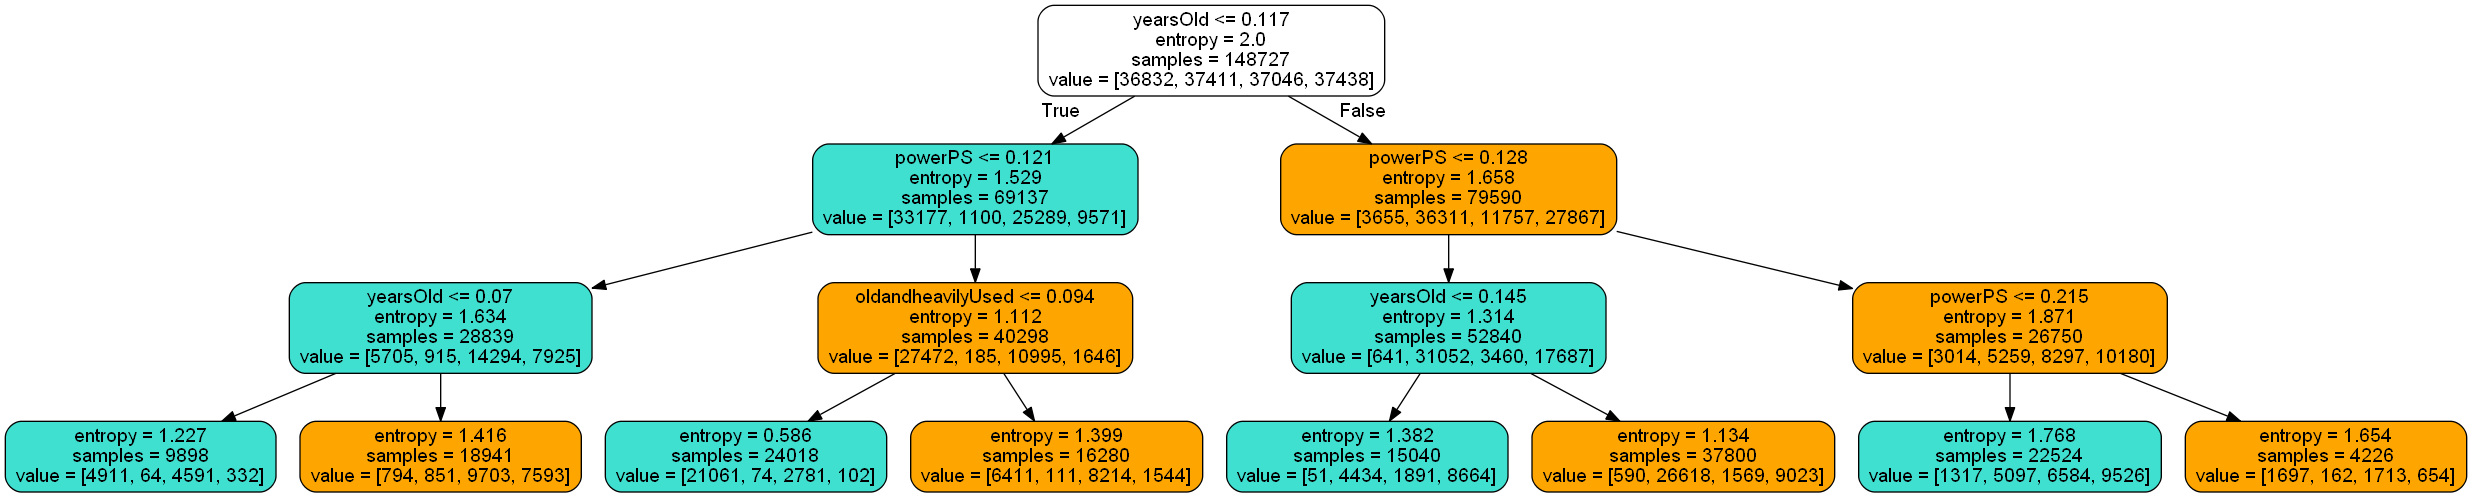

In [108]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

data_feature_names=X_all.columns

dot_data = tree.export_graphviz(clf_entropy,
                                feature_names=data_feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')
Image(graph.create_png())

In [109]:
y_pred = clf_entropy.predict(X_test)
y_pred
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  60.8500080684202


In [110]:
predictions = clf_entropy.predict(X_test)
true_positives = 1.0
false_positives = 1.0
true_negatives = 1.0
false_negatives = 1.0
for i in range(0, len(y_test.values)):
    if (y_test.values[i] == predictions[i]):
        if (predictions[i] == 1.0):
            true_positives+=1.0
        else:
            true_negatives+=1.0
    else:
        if (predictions[i] == 1.0):
            false_positives += 1.0
        else:
            false_negatives += 1.0
            
print ("True positives:", true_positives)
print ("False positives:", false_positives)

print ("True Negatives:", true_negatives)
print ("False Negatives:", false_negatives)
prec = true_positives / (true_positives  + false_positives)
recall_score = true_positives / (true_positives  + false_negatives)
print ("precision:", prec)
print ("recall:", recall_score)
f1score = 2 * prec * recall_score / (prec + recall_score)
print ("f1score:", f1score)

accuracy_DT = round(clf_entropy.score(X_train, y_train) * 100, 2)
accuracy_DT

True positives: 17457.0
False positives: 7512.0
True Negatives: 42879.0
False Negatives: 31308.0
precision: 0.6991469422083383
recall: 0.357982159335589
f1score: 0.4735128977134022


60.79

Analyzing the evaluation of the two decision trees
<br>
As it is clear, the f1-score and accuracy of both decision trees are very close. However, since the “information gain” results in a better precision, it seems like a better choice for our purpose. 


Data Interpretation for our Story:
<br>
The decision tree implementation in general, and the visualised version in particular, is a very good tool for making sense of the features that can influence our price. As an example, “old and heavilyUsed” cars are detected strongly as cheaper ones after implementing the decision tree algorithm. Another example is powerPS, which can be a very good indicator for the price of the used cars.
<br>


# Random Forests : without feature importance
Build a Random Forest  classifier to predict a categorical variable in the given dataset and build a story around our dataset.
<br>
Random Forest algorithm is the supervised learning algorithm, Decision tree is the building block of random forest, it randomly selects certain variables on x axis to create n number of trees and provides accuracy based on decision provided by maximum number of trees in the forest.


In [111]:
# Defining the Random Forest Classifier
RF = RandomForestClassifier()
RF.fit(X_train,y_train)

C:\Users\PB\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [112]:
# TP, TN, FP , FN, Recall and F1 Score

predictions = RF.predict(X_test)
true_positives = 1.0
false_positives = 1.0
true_negatives = 1.0
false_negatives = 1.0
for i in range(0, len(y_test.values)):
    if (y_test.values[i] == predictions[i]):
        if (predictions[i] == 1.0):
            true_positives+=1.0
        else:
            true_negatives+=1.0
    else:
        if (predictions[i] == 1.0):
            false_positives += 1.0
        else:
            false_negatives += 1.0
            
print ("True positives:", true_positives)
print ("False positives:", false_positives)

print ("True Negatives:", true_negatives)
print ("False Negatives:", false_negatives)
prec = true_positives / (true_positives  + false_positives)
recall_score = true_positives / (true_positives  + false_negatives)
print ("precision:", prec)
print ("recall:", recall_score)
f1score = 2 * prec * recall_score / (prec + recall_score)
print ("f1score:", f1score)
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)

True positives: 19729.0
False positives: 5302.0
True Negatives: 56189.0
False Negatives: 17936.0
precision: 0.788182653509648
recall: 0.5238019381388557
f1score: 0.6293543447747862
Accuracy is  60.8500080684202


In [113]:
#Classification Report : The classification_report function builds a text report 
#showing the main classification metrics
p = RF.predict(X_test)
print(classification_report(y_test, p))

             precision    recall  f1-score   support

          0       0.88      0.88      0.88     24765
          1       0.79      0.80      0.79     24766
          2       0.73      0.74      0.73     24693
          3       0.66      0.65      0.66     24928

avg / total       0.77      0.77      0.77     99152



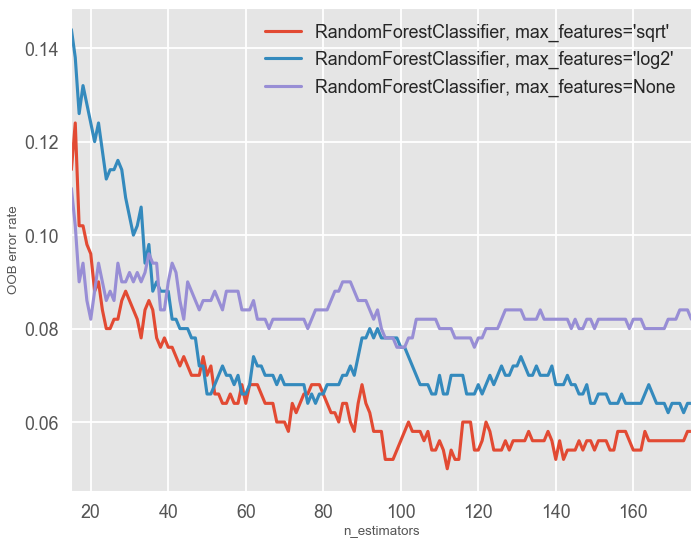

In [116]:
#Out-of-bag (OOB) error : The out-of-bag (OOB) error is the average error for each  calculated using predictions from the
# trees that do not contain  in their respective bootstrap sample. 
# This allows the RandomForestClassifier to be fit and validated whilst being trained 

import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

RANDOM_STATE = 123

# Generate a binary classification dataset.
X, y = make_classification(n_samples=500, n_features=25,
                           n_clusters_per_class=1, n_informative=15,
                           random_state=RANDOM_STATE)

Errors = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in Errors)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 175

for label, clf in Errors:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [154]:
#  Model Accuracy, how often is the classifier correct?
accuracy_RF = round(RF.score(X_train, y_train) * 100, 2)
accuracy_RF

87.25

<b>Observation</b>
We wanted to create different catalogues for different customer class. 
<br>
Therefore, we used Decision tress classifier and Ranadom forest classifier to help us classifying all the cars in different classes - economy class and luxury class.
<br>
Out of this Random forest classifier gave us more accuracy as compared to Decision tree classifier.Random*


# Model Tuning
<br>
<b> Feature Importance for Random Forest</b>
<br>
Generally, importance provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. The more an attribute is used to make key decisions with decision trees, the higher its relative importance

C:\Users\PB\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Feature Importance from Random Forest

[1.00611979e-03 2.94092454e-05 1.18670740e-03 7.76514818e-07
 7.48906634e-05 1.79349675e-06 4.53529968e-04 1.45465833e-06
 4.76216415e-03 2.08413788e-01 1.39458648e-01 8.27135095e-02
 2.11024068e-01 3.96243474e-02 0.00000000e+00 5.38871221e-02
 3.48069174e-04 5.26725448e-06 2.56061973e-05 1.19172404e-06
 1.10757411e-05 4.83161210e-02 1.21051572e-02 1.52461526e-03
 5.51562074e-04 2.77983030e-06 1.67555540e-02 3.27896349e-03
 2.85383009e-03 1.38083226e-04 9.92351791e-05 5.63985522e-04
 1.07626839e-03 4.21466144e-03 5.70469792e-05 8.80801210e-05
 2.19369151e-04 1.69933989e-04 5.28347863e-05 2.17207698e-04
 8.46518552e-03 3.46707987e-03 8.54566977e-03 8.01143442e-03
 9.38147095e-04 5.70427322e-03 0.00000000e+00 1.29553381e-01]
The 15 most influencing features are
%d. feature %d (%f) (1, 'date_crawled', 0.21102406792122744)
%d. feature %d (%f) (2, 'dateCreated', 0.20841378800044602)
%d. feature %d (%f) (3, 'postalCode', 0.13945864835104393)
%d. feature

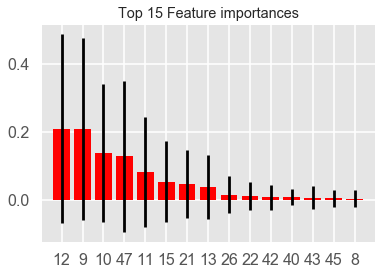

Mean Feature Importance 0.020833


In [155]:

# Run Random Forest Classification Estimator to see what the best contributing features for decision making.
from sklearn.ensemble import RandomForestClassifier
import numpy as np

estimator = RandomForestClassifier(n_estimators=300, max_depth=3, n_jobs=15)
estimator.fit(X_train,y_train) 

print ("Feature Importance from Random Forest\n")
print (estimator.feature_importances_)

importances = estimator.feature_importances_ 
std = np.std([tree.feature_importances_ for tree in estimator.estimators_], axis=0) 
indices = np.argsort(importances)[::-1]

print("The 15 most influencing features are") 
top_features = []

for f in range(15): 
    # print("%d. \t %s(%f)" % (f + 1, data_clean.columns[indices[f-1]], importances[indices[f]]))
    print("%d. feature %d (%f)",(f + 1, final_data.columns[indices[f]], importances[indices[f]]))
    top_features.append(indices[f])
    
    
print (top_features)
    
#Plot the feature importances of the forest 
indices=indices[:15] 
plt.figure() 
plt.title("Top 15 Feature importances") 
plt.bar(range(15), importances[indices], color="r", yerr=std[indices], align="center") 
plt.xticks(range(15), indices) 
plt.xlim([-1, 15]) 
plt.show() 
#Mean Feature Importance 
print ("Mean Feature Importance %.6f" %np.mean(importances))

# Random Forest with feature importance

In [156]:
# Excluded the date and time related fields 
from sklearn.linear_model import LogisticRegression
columns = ['mercedes_benz', 'year_registered', 'diesel', 'postalCode',
       'electric', 'astra', 'a4','lpg','5er','coupe','passat']

X_RF = final_data[columns]
Y_RF = final_data[label_field]

X_train, X_test, y_train, y_test = train_test_split(X_RF,Y_RF,test_size=0.4,random_state=1)

In [157]:
RF_withFeatureImp = RandomForestClassifier()
RF_withFeatureImp.fit(X_train,y_train)

C:\Users\PB\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [158]:
predictions = RF_withFeatureImp.predict(X_test)
true_positives = 1.0
false_positives = 1.0
true_negatives = 1.0
false_negatives = 1.0
for i in range(0, len(y_test.values)):
    if (y_test.values[i] == predictions[i]):
        if (predictions[i] == 1.0):
            true_positives+=1.0
        else:
            true_negatives+=1.0
    else:
        if (predictions[i] == 1.0):
            false_positives += 1.0
        else:
            false_negatives += 1.0
            
print ("True positives:", true_positives)
print ("False positives:", false_positives)

print ("True Negatives:", true_negatives)
print ("False Negatives:", false_negatives)
prec = true_positives / (true_positives  + false_positives)
recall_score = true_positives / (true_positives  + false_negatives)
print ("precision:", prec)
print ("recall:", recall_score)
f1score = 2 * prec * recall_score / (prec + recall_score)
print ("f1score:", f1score)

True positives: 1.0
False positives: 1.0
True Negatives: 57960.0
False Negatives: 41194.0
precision: 0.5
recall: 2.4274790629930816e-05
f1score: 4.8547224312449936e-05


In [159]:
p1 = RF_withFeatureImp.predict(X_test)
print(classification_report(y_test, p1))

                    precision    recall  f1-score   support

         expensive       0.68      0.70      0.69     24614
    less_expensive       0.65      0.68      0.66     24953
mid_high_expensive       0.51      0.49      0.50     24595
 mid_low_expensive       0.49      0.47      0.48     24990

       avg / total       0.58      0.58      0.58     99152



In [160]:
accuracy_RF = round(RF_withFeatureImp.score(X_train, y_train) * 100, 2)
accuracy_RF

88.36

<b>After doing feature enhancement we increased the accuracy from 87% to 88.4% for random forest</b>

# Support Vector Machine 
We usedSVM algorithm to classify the categories of expense range of the cars.

In [323]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
data.dtypes
label_field = ['expense_range']
Y = final_data[label_field]
training_fields = ['powerPS', 'kilometer', 'yearsOld', 'repaired','kodemonkeysrecommended']
training_fields = ['oldandheavilyUsedAndDamaged','peugeot', 'kia',
                   'fiat','seat','toyota','nissan','skoda','jaguar','porsche','oldandheavilyUsed',
                   'powerPS', 'kilometer', 'yearsOld', 'gearbox_category',"benzin","diesel","lpg",
                   "other","hybrid","cng","electric","smallcar","cabrio","van","Midsize","VehicleTypeother",
                   "suv","bus","coupe","golf","fabia","3er","polo","corsa","a4","passat","astra",
                   "5er","c_klasse","volkswagen","bmw","mercedes_benz","opel","audi","ford","renault","repaired",
                   "kodemonkeysrecommended"]
#training_fields = ['less_expensive','powerPS', 'kilometer', 'yearsOld', 'repaired']

X = final_data[training_fields]
scaled_X = scaler.fit_transform(X)

le = LabelEncoder()
le.fit(Y['expense_range'].astype(str))
Y['expense_range'] = le.transform(Y['expense_range'].astype(str))

Y_label = pd.DataFrame(Y, columns=label_field)
scaled_X = pd.DataFrame(scaled_X, columns=training_fields)
X.head()


X_all= scaled_X[training_fields[1:]]
training_fields[1:]

X_train, X_test, y_train, y_test = train_test_split(X_all, Y, test_size=0.4, random_state=0)

In [324]:
from sklearn import svm

#Create a svm Classifier
clf_svm = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf_svm.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf_svm.predict(X_test)

C:\Users\PB\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [328]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 71.9329917702114


In [330]:
predictions = clf_svm.predict(X_test)
true_positives = 1.0
false_positives = 1.0
true_negatives = 1.0
false_negatives = 1.0
for i in range(0, len(y_test.values)):
    if (y_test.values[i] == predictions[i]):
        if (predictions[i] == 1.0):
            true_positives+=1.0
        else:
            true_negatives+=1.0
    else:
        if (predictions[i] == 1.0):
            false_positives += 1.0
        else:
            false_negatives += 1.0
            
print ("True positives:", true_positives)
print ("False positives:", false_positives)

print ("True Negatives:", true_negatives)
print ("False Negatives:", false_negatives)
prec = true_positives / (true_positives  + false_positives)
recall_score = true_positives / (true_positives  + false_negatives)
print ("precision:", prec)
print ("recall:", recall_score)
f1score = 2 * prec * recall_score / (prec + recall_score)
print ("f1score:", f1score)

True positives: 19313.0
False positives: 6734.0
True Negatives: 52012.0
False Negatives: 21097.0
precision: 0.7414673474872346
recall: 0.4779262558772581
f1score: 0.5812179303910799


# K - Nearest Neighbour (KNN)

In [ ]:
# Since the dataset is huge, runs forever
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

C:\Users\PB\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#We can observe above that we get maximum testing accuracy for k=# or k=#. 
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=4)

In [ ]:
#Fit the model
knn.fit(X_train,y_train)

In [ ]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

# Naive Bayes
<br>
Perform Naive Bayes classification on the used car database that has been chosen for our machine learning project.

Problem formulation:
<br>
Given a pair of features from the dataset, perform supervised machine learning on the dataset to identify the probability of a resultant feature. We have chosen brand and model as the input features and the vehicle type as the outcome feature.
<br>



Story:
<br>
The story that we were able to tell from this exercise was to predict the most popularly sold body type of a car given the make and model of a car. Ie. If a Mercedez Benz C300 is given as input, the model should be able to predict sedan as the outcome.
<br>


In [161]:
# Create categorical for vehicle type
work_data.vehicleType = pd.Categorical(work_data.vehicleType)
work_data['vehicletype_coded'] = work_data.vehicleType.cat.codes
vehicle_array = work_data['vehicletype_coded'].tolist()
vehicle_array[:5]

[5, 5, 7, 2, 7]

In [162]:
# Create categorical for brand type
work_data.brand = pd.Categorical(work_data.brand)
work_data['brand_coded'] = work_data.brand.cat.codes
brand_array = work_data['brand_coded'].tolist()
brand_array[:5]

[37, 31, 2, 25, 19]

In [163]:
# Create categorical for model type
work_data.model = pd.Categorical(work_data.model)
work_data['model_coded'] = work_data.model.cat.codes
model_array = work_data['model_coded'].tolist()
model_array[:5]

[118, 103, 11, 8, 10]

In [164]:
input = zip(brand_array, model_array)
ilist = list(input)
ilist[:5]

[(37, 118), (31, 103), (2, 11), (25, 8), (19, 10)]

In [165]:

gnb = GaussianNB()
gnb.fit(ilist, vehicle_array)
prediction = gnb.predict([[37, 118]])
print(work_data.vehicleType[prediction])

5    van
Name: vehicleType, dtype: category
Categories (8, object): [Midsize, bus, cabrio, coupe, other, smallcar, suv, van]


In [204]:
gnb.score(ilist, vehicle_array)

0.3146736915995304

Observations
<br>
Give the large number of categoricals on the dataset it was seen that the accuracy of the training was a low value


# Preciting the price of the car using Linear, Decision tree Regressor and Random forest Regressor
<br>
Since We need to predict the price of the car based on the given features,we used regression algorithms and compared which  model performs better.    

# Linear Regression with price as target variable.

We used year registered, gearbox,power of the car,Kilometer,Fuel type,Vehicle type, month registered, brand, if the the car had repair/damage, and latent variable years Old information as our input variables and pridected price of the car.

In [184]:
data_reg=super_cleaned_data

In [185]:
data_reg[['price'
                        ,'year_registered'
                        ,'gearbox'
                        ,'powerPS'
                        ,'kilometer'
                        ,'fuelType'
                        ,'vehicleType'
                        ,'month_registered'
                        ,'brand'
                        ,'notRepairedDamage','yearsOld']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247879 entries, 3 to 371527
Data columns (total 11 columns):
price                247879 non-null int64
year_registered      247879 non-null object
gearbox              247879 non-null object
powerPS              247879 non-null int64
kilometer            247879 non-null int64
fuelType             247879 non-null object
vehicleType          247879 non-null object
month_registered     247879 non-null object
brand                247879 non-null object
notRepairedDamage    247879 non-null object
yearsOld             247879 non-null int64
dtypes: int64(4), object(7)
memory usage: 32.7+ MB


Label encoding the categorical variables ( listed under "labels" ) and combining with numerical columns names price,power of the car, kilometer and years old.

In [186]:
labels = ['year_registered', 'gearbox', 'fuelType', 'vehicleType', 'month_registered','brand','notRepairedDamage']
les = {}

for l in labels:
    les[l] = preprocessing.LabelEncoder()
    les[l].fit(data_reg[l])
    tr = les[l].transform(data_reg[l]) 
    data_reg.loc[:, l + '_feat'] = pd.Series(tr, index=data_reg.index)

df_autos = data_reg[ ['price','powerPS','kilometer','yearsOld'] 
                    + [x+"_feat" for x in labels]]
autos = df_autos.values.astype(float)

Y = autos[:,0]
X = autos[:,1:]
Y = np.log1p(Y)
print(Y)
print(X)

[ 7.31388683  8.18896686  6.47850964 ...  7.09007684  9.12706745
 10.27474072]
[[7.50e+01 1.50e+05 1.50e+01 ... 9.00e+00 3.70e+01 0.00e+00]
 [6.90e+01 9.00e+04 8.00e+00 ... 1.00e+01 3.10e+01 0.00e+00]
 [1.02e+02 1.50e+05 2.10e+01 ... 2.00e+00 2.00e+00 1.00e+00]
 ...
 [1.01e+02 1.25e+05 1.60e+01 ... 6.00e+00 3.20e+01 0.00e+00]
 [1.02e+02 1.50e+05 2.00e+01 ... 6.00e+00 3.70e+01 0.00e+00]
 [3.20e+02 5.00e+04 3.00e+00 ... 1.10e+01 2.00e+00 0.00e+00]]


In [187]:
#In this function, we pass the model name ( variable "model") and the X and Y values defined above
#to derive the root mean squared error for each of the
#regressor type ( linear, decision tree regressor and random forest regressor)
from sklearn.model_selection import cross_val_score, train_test_split


def cv_rmse(model, X, Y):
    r = np.sqrt(-cross_val_score(model, X, Y, scoring="neg_mean_squared_error", cv = 5))
    return r

In [188]:
#Linear Regression
linear = LinearRegression()

#Split into data for training and validation
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
linear.fit(X_train, y_train)

# Explained variance score: 1 is perfect prediction
score = linear.score(X_test, y_test)
print('Variance score: %.2f' % score)

print("rmse on validation set", cv_rmse(linear, X_test, y_test).mean())

(173515, 10) (74364, 10) (173515,) (74364,)
Variance score: 0.65
rmse on validation set 0.6896918346007298


In [189]:
#Defining variables used in sample prediction calculations.
r = range(2003, 2017)
km_year = 10000

# Predicting the price using Linear regression model for the sample input data.

If a buyer is looking for a car with below specifications like power=120,Kilometer on the car=100000, 
and 7 years old,year registered in 2010 and gear box is manual, fuel type= diesel, 
vehicle type=bus,month registered=october, brand=Volkswagen, car did not have repair/damage, then what is the ideal
price for the car?

We also plotted price variance over range of 14 years based on same input values. This will show how the price is going to vary in the next 14 years based on input parameters.

[12579.91365652]
[9710.28927572]


(<matplotlib.legend.Legend at 0x3d024160>,)

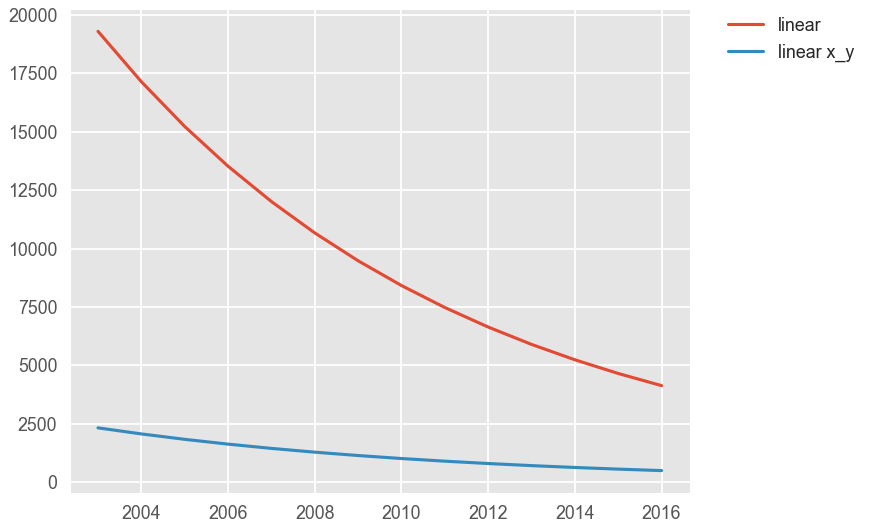

In [194]:
#The function a_values, takes input variables and converts the  variables which are categorical by
#performing label encoding and runs through the regressor model to predict the price.

def a_values(model,powerPS, kilometer, yearsOld, year_registered, gearbox, fuelType, vehicleType, month_registered, 
                brand,notRepairedDamage):
    sample = [powerPS
          , kilometer
          , yearsOld
          , les['year_registered'].transform([year_registered])
          , les['gearbox'].transform([gearbox])
          , les['fuelType'].transform([fuelType])
          , les['vehicleType'].transform([vehicleType])
          , month_registered
          , les['brand'].transform([brand])
          , les['notRepairedDamage'].transform([notRepairedDamage]) ]
    s_predict = np.expm1(model.predict([sample]))
    return s_predict

l1 = a_values(linear, 120,100000,7,'2010','manual','diesel','bus',10,'volkswagen','no')
l2 = a_values(linear, 100,50000,12,'2008','automatic','petrol','smallcar',1,'bmw','yes')
print(l1)
print(l2)

v_lin  = [a_values(linear,120,km_year*2*(2017-y),(2017-y),'2010','manual','diesel','bus',1,'volkswagen','no') for y in r]
v_lin2 = [a_values(linear,100,km_year*2*(2017-y),(2017-y),'2008','automatic','petrol','smallcar',1,'bmw','yes') for y in r]

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(r, v_lin, label='linear'),
plt.plot(r, v_lin2, label='linear x_y'),


#plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.),

From the above output we can see that for the first car specification the linear regression model predicted the price as "12579.91 Euros". For the second sample set the target price came out as "9710.28 Euros."

The 14 year prediction graph shows how the price varies from 2003 to 2017 for the 2 sample sets. We can see price depricated year over year.

# Decision tree Regressor with price as target variable.

In [195]:
from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [196]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % tree_reg.score(X_test, y_test))

print(np.sqrt(np.mean((y_test - tree_reg.predict(X_test))**2)))
print("rmse on validation set", cv_rmse(tree_reg, X_test, y_test).mean())

Variance score: 0.74
0.601100676489511
rmse on validation set 0.6834003688312482


# Predicting the price using Decision Tree regression model for the same sample input data so that we can compare the models.

[15500.]
[1250.]


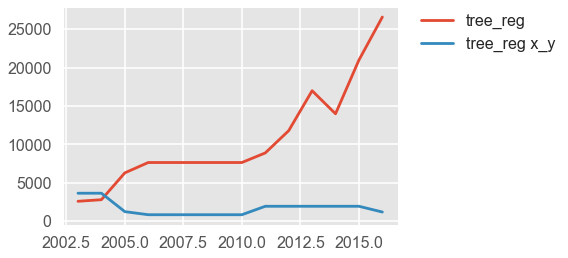

In [198]:
t1 = a_values(tree_reg, 120,100000,7,'2010','manual','diesel','bus',10,'volkswagen','no')
t2 = a_values(tree_reg, 100,50000,12,'2008','automatic','petrol','smallcar',1,'bmw','yes')

print(t1)
print(t2)

v_lin  = [a_values(tree_reg,120,km_year*2*(2017-y),(2017-y),'2010','manual','diesel','bus',1,'volkswagen','no') for y in r]
v_lin2 = [a_values(tree_reg,100,km_year*2*(2017-y),(2017-y),'2008','automatic','petrol','smallcar',1,'bmw','yes') for y in r]

plt.plot(r, v_lin, label='tree_reg')
plt.plot(r, v_lin2, label='tree_reg x_y')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

From the above output we can see that for the first car specification the linear regression model predicted the price as "15500 Euros". 
For the second sample set the target price came out as "1250 Euros."
We see that price of the second car is varying way to high when compared to Linear Regression.

The 14 year prediction graph shows how the price varies from 2003 to 2017 for the 2 sample sets. We can see price depricated year over year.

# Random Forest Regressor with price as target variable and 20 Esitimators

In [199]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 20)
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [200]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % forest.score(X_test, y_test))
print(np.sqrt(np.mean((y_test - forest.predict(X_test))**2)))
print("rmse on validation set", cv_rmse(forest, X_test, y_test).mean())

Variance score: 0.83
0.4899698465200031
rmse on validation set 0.5207153329700099


# Predicting the price using Random regression model for the same sample input data so that we can compare with the above 2 regressor  models

[14249.71261466]
[2174.56107482]


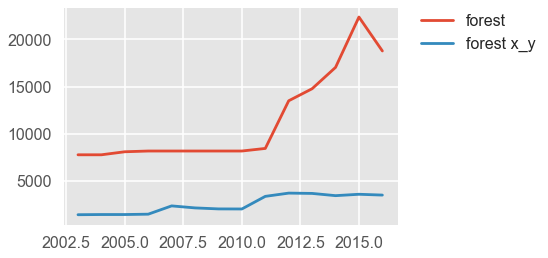

In [201]:
r1 = a_values(forest, 120,100000,7,'2010','manual','diesel','bus',10,'volkswagen','no')
r2 = a_values(forest, 100,50000,12,'2008','automatic','petrol','smallcar',1,'bmw','yes')

print(r1)
print(r2)


v_lin  = [a_values(forest,120,km_year*2*(2017-y),(2017-y),'2010','manual','diesel','bus',1,'volkswagen','no') for y in r]
v_lin2 = [a_values(forest,100,km_year*2*(2017-y),(2017-y),'2008','automatic','petrol','smallcar',1,'bmw','yes') for y in r]

plt.plot(r, v_lin, label='forest')
plt.plot(r, v_lin2, label='forest x_y')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

From the above output we can see that for the first car specification the linear regression model predicted 
the price as "12049.61 Euros" and for the  second sample set the target price came out as "3111.32 Euros"
    
The 14 year prediction graph shows how the price varies from 2003 to 2017 for the 2 sample sets. We can see price
depricated year over year.

# Conclusion:
We ran below classifier , on our target variable "expense range". 

| Classification Algorithm| F1Score  | Accuracy |
|-------------------------|----------|----------|
| Logistic                | 0.55     | 66.76    |
| Decision Tree           | 0.48     | 62.31    |
| Random Forest           | 0.58     | 88.27    |
| SVM                     | 0.58     | 71.93    |
| Naive Bayes             |  -       | 0.31     |
| KNN                     |  -       |  -       |

From above table is infere Random Forest is best classification model with accuracy = 88.27.

The classification model - "Random Forest" which we have developed would help the seller to categorise all the cars in different classes, to be precise less_expensive, mid_expensive, high_expensive. This would help him create a broucher or a catalogue for different classes of customers. 

However, We also wanted to develop a prediction model to predict ideal price of used car. 
To achive this we used below regression techniques 


| Regression Algorithm    | Variance | RMSE  |
|-------------------------|----------|-------|
| Linear Regression       | 0.65     | 0.689 |
| Decision Tree Regressor | 0.74     | 0.681 |
| Random Forest Regressor | 0.82     | 0.519 |

We know that Variance value closed to 1 says that model is good, So we would recommend to go with random forest regresser for predicting car price.

To summarize, based on our analysis, the best Machine Learning technique was "RANDOM FOREST" Regressor and Classifier to achieve our business goal.